In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
#df_clear = pd.read_csv("data_clear.csv", delimiter="\t")
df_clear = pd.read_csv("data.csv", sep="\t")

df_clear.head

pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral',
    'Happy',
    'Sad',
    'Angry',
    'Surprised',
    'Scared',
    'Disgusted'
]

action_unit_features = df_clear.columns[df_clear.columns.str.startswith('Action_Unit_')]


df_clear[action_unit_features].shape
df_clear.columns

/tmp/ipykernel_3367/4190569399.py:2: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clear = pd.read_csv("data.csv", sep="\t")


Index(['Index_', 'Video_Time', 'Neutral', 'Happy', 'Sad', 'Angry', 'Surprised',
       'Scared', 'Disgusted', 'Valence', 'Arousal', 'Gender', 'Age', 'Beard',
       'Moustache', 'Glasses', 'Ethnicity', 'Y___Head_Orientation',
       'X___Head_Orientation', 'Z___Head_Orientation', 'Landmarks',
       'three_d_Landmarks', 'Quality', 'Mouth', 'Left_Eye', 'Right_Eye',
       'Left_Eyebrow', 'Right_Eyebrow', 'Identity',
       'Action_Unit_01___Inner_Brow_Raiser',
       'Action_Unit_02___Outer_Brow_Raiser', 'Action_Unit_04___Brow_Lowerer',
       'Action_Unit_05___Upper_Lid_Raiser', 'Action_Unit_06___Cheek_Raiser',
       'Action_Unit_07___Lid_Tightener', 'Action_Unit_09___Nose_Wrinkler',
       'Action_Unit_10___Upper_Lip_Raiser',
       'Action_Unit_12___Lip_Corner_Puller', 'Action_Unit_14___Dimpler',
       'Action_Unit_15___Lip_Corner_Depressor', 'Action_Unit_17___Chin_Raiser',
       'Action_Unit_18___Lip_Pucker', 'Action_Unit_20___Lip_Stretcher',
       'Action_Unit_23___Lip_Tightene

array([0.5792756, 0.196218 ])

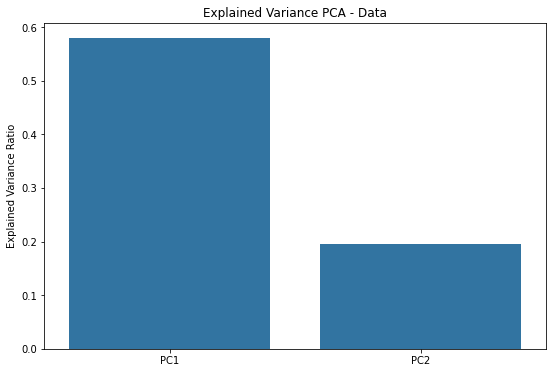

In [11]:
emotion_columns = ['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted']

df_clear_emotions = df_clear[emotion_columns]

def perform_pca_and_plot(df, title):
    pca = PCA(n_components=2)
    pca.fit(df)
    explained_variance = pca.explained_variance_ratio_

    plt.figure(figsize=(9,6))
    sns.barplot(x=['PC1', 'PC2'], y=explained_variance)
    plt.title(title)
    plt.ylabel('Explained Variance Ratio')
    return explained_variance

explained_variance_clear = perform_pca_and_plot(df_clear_emotions, 'Explained Variance PCA - Data')

explained_variance_clear

[0.5792756  0.196218   0.09798496 0.07046114 0.03914692 0.01211539
 0.00479799]


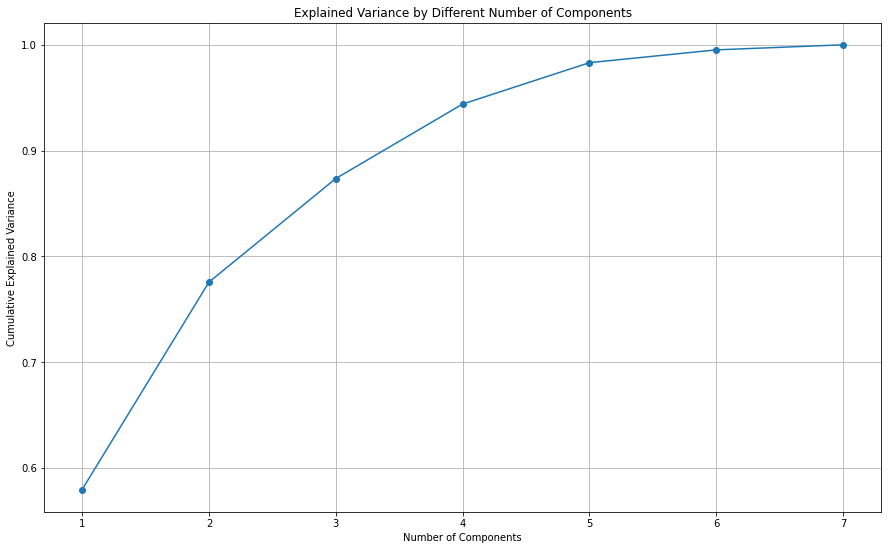

In [9]:
pca_variations = PCA().fit(df_clear_emotions)
print(pca_variations.explained_variance_ratio_)
plt.figure(figsize=(15, 9))
plt.plot(range(1, len(pca_variations.explained_variance_ratio_) + 1),
         np.cumsum(pca_variations.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Number of Components')
plt.grid(True)
plt.show()

[3.11006838e-01 2.30457296e-01 1.59345543e-01 8.43466399e-02
 6.85619424e-02 2.61830378e-02 2.12324575e-02 1.52968531e-02
 1.42384016e-02 1.29023879e-02 1.09643908e-02 1.00953967e-02
 9.32465650e-03 5.37896530e-03 5.09009430e-03 3.95168013e-03
 3.06979442e-03 2.90433443e-03 2.57181368e-03 8.32338828e-04
 5.80667631e-04 4.03844725e-04 3.25911200e-04 1.79371292e-04
 1.61013334e-04 1.24512361e-04 1.20747510e-04 8.94441642e-05
 4.81455563e-05 4.77114000e-05 4.25153606e-05 4.17576216e-05
 2.40178794e-05 2.01400719e-05 1.65843421e-05 1.23994227e-05
 5.19778103e-06 1.15699941e-06 9.04953007e-12 7.82906180e-18
 1.99340891e-33 1.99340891e-33]


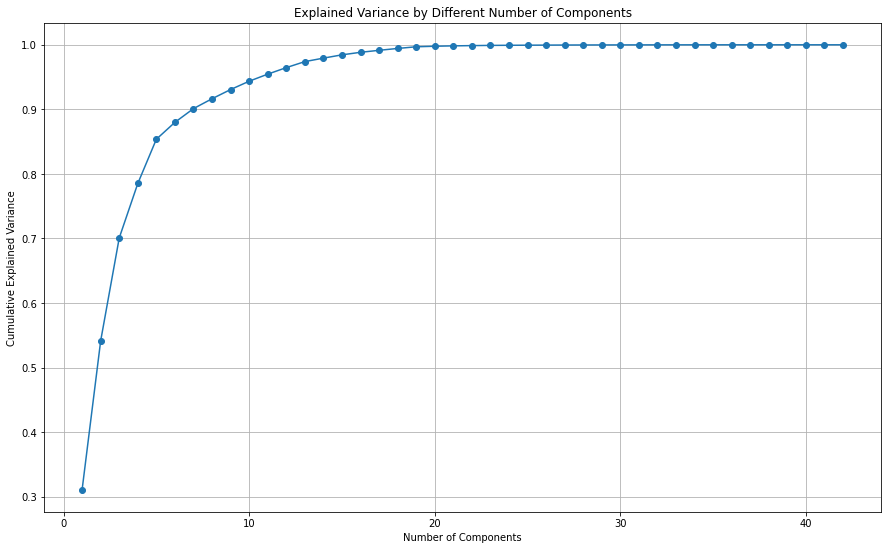

In [6]:
pca_variations = PCA().fit(df_clear[action_unit_features])
print(pca_variations.explained_variance_ratio_)
plt.figure(figsize=(15, 9))
plt.plot(range(1, len(pca_variations.explained_variance_ratio_) + 1),
         np.cumsum(pca_variations.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Number of Components')
plt.grid(True)
plt.show()

На графике показано, как изменяется накопленная объясненная дисперсия в зависимости от количества компонент в анализе главных компонент (PCA) для чистых данных. Из этого графика можно сделать вывод о том, сколько компонент необходимо, чтобы объяснить значительную часть вариативности данных.

            Neutral     Happy       Sad     Angry  Surprised    Scared  \
Neutral    1.000000 -0.593115 -0.186503 -0.354349  -0.196692 -0.097864   
Happy     -0.593115  1.000000 -0.132167 -0.140280  -0.104042 -0.061447   
Sad       -0.186503 -0.132167  1.000000  0.046939  -0.022543 -0.008799   
Angry     -0.354349 -0.140280  0.046939  1.000000  -0.100310  0.026209   
Surprised -0.196692 -0.104042 -0.022543 -0.100310   1.000000  0.003926   
Scared    -0.097864 -0.061447 -0.008799  0.026209   0.003926  1.000000   
Disgusted -0.289866 -0.085781  0.016850  0.022541  -0.053904 -0.026267   
Valence   -0.100480  0.794265 -0.297429 -0.571495  -0.006328 -0.112421   
Arousal   -0.700193  0.276598  0.088150  0.265494   0.329811  0.202088   

           Disgusted   Valence   Arousal  
Neutral    -0.289866 -0.100480 -0.700193  
Happy      -0.085781  0.794265  0.276598  
Sad         0.016850 -0.297429  0.088150  
Angry       0.022541 -0.571495  0.265494  
Surprised  -0.053904 -0.006328  0.329811  
S

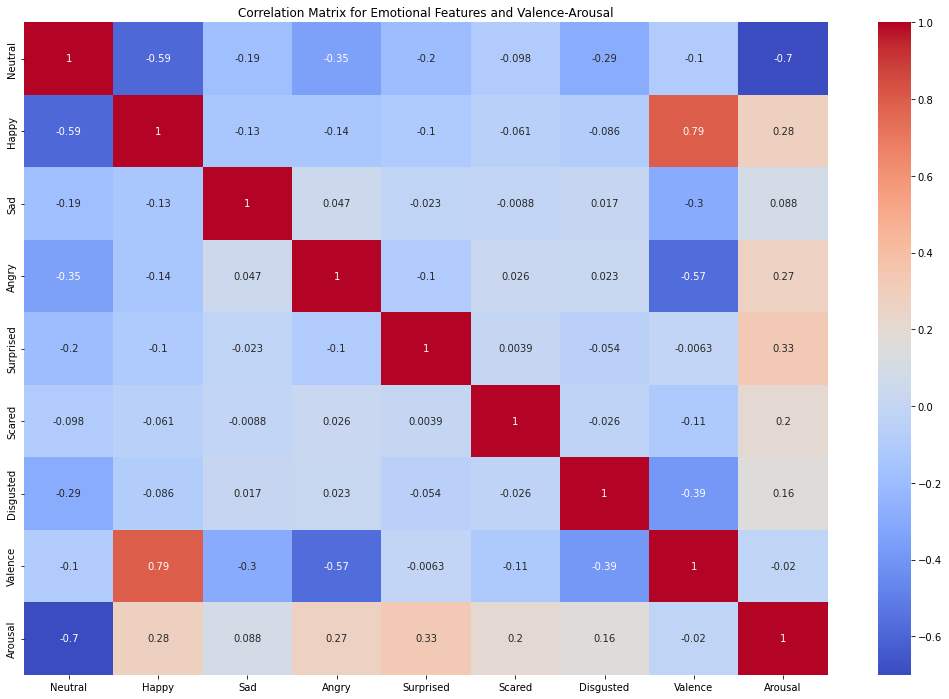

In [10]:
# Создание нового DataFrame для анализа корреляции, включая Valence и Arousal
df_clear_correlation = df_clear[emotion_columns + ['Valence', 'Arousal']]

# Расчет матрицы корреляций
correlation_matrix = df_clear_correlation.corr()
print(correlation_matrix)
# Визуализация матрицы корреляций
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Emotional Features and Valence-Arousal')
plt.show()


На представленной матрице корреляций можно увидеть, как эмоциональные признаки (Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted) коррелируют с переменными Valence и Arousal из чистых данных (df_clear). Цвета на графике показывают силу корреляции между переменными: более теплые цвета указывают на положительную корреляцию, а более холодные — на отрицательную.

Этот анализ позволяет нам понять взаимосвязи между различными эмоциональными состояниями и их проекцией на двумерное пространство Valence-Arousal, что может быть важно для последующего построения регрессионных моделей для восстановления этих эмоций из значений Valence и Arousal.

Вывод: последние 2 признака имеют высокую корреляцию с другими признакми, это говорит о предпоссылки к тому чтобы из 2 восстановить 7 признаков

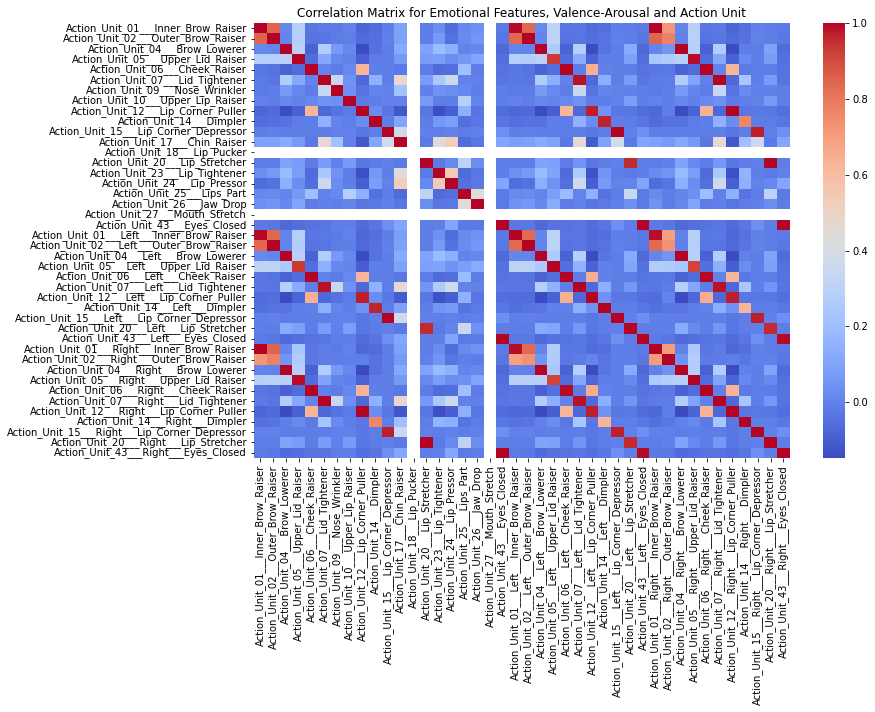

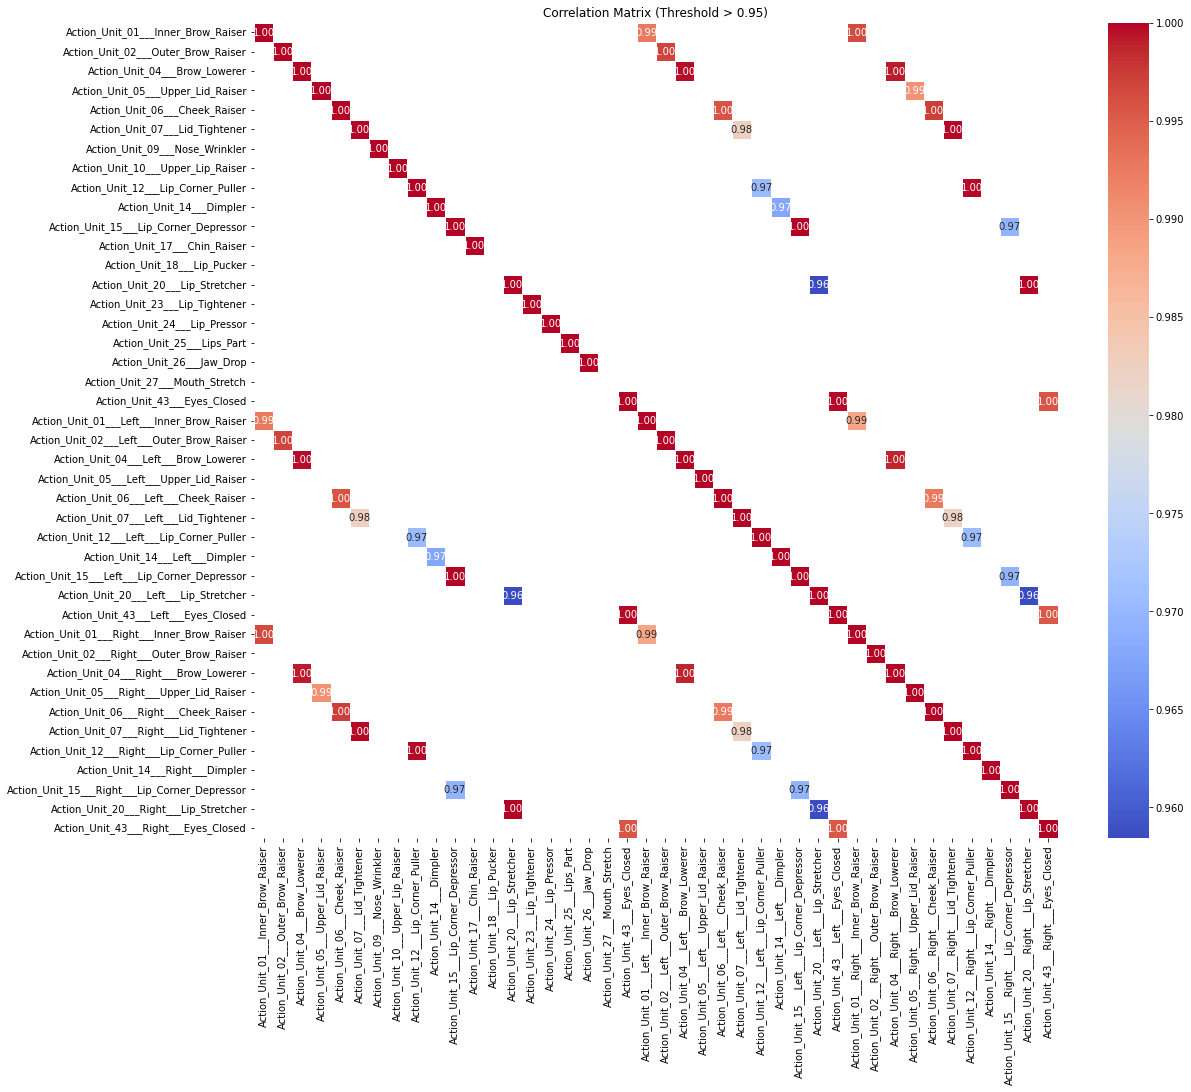

In [11]:
# Создание нового DataFrame для анализа корреляции, включая Valence и Arousal
list(action_unit_features.values)
df_clear_correlation = df_clear[emotion_columns + list(action_unit_features.values) + ['Valence', 'Arousal']]
df_clear_correlation = df_clear[list(action_unit_features.values)]

# Расчет матрицы корреляций
correlation_matrix = df_clear_correlation.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Emotional Features, Valence-Arousal and Action Unit')
plt.show()

threshold = 0.95
filtered_correlation_matrix = correlation_matrix[abs(correlation_matrix) > threshold]

# Создайте тепловую карту для визуализации
plt.figure(figsize=(18, 15))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Threshold > 0.95)")
plt.show()

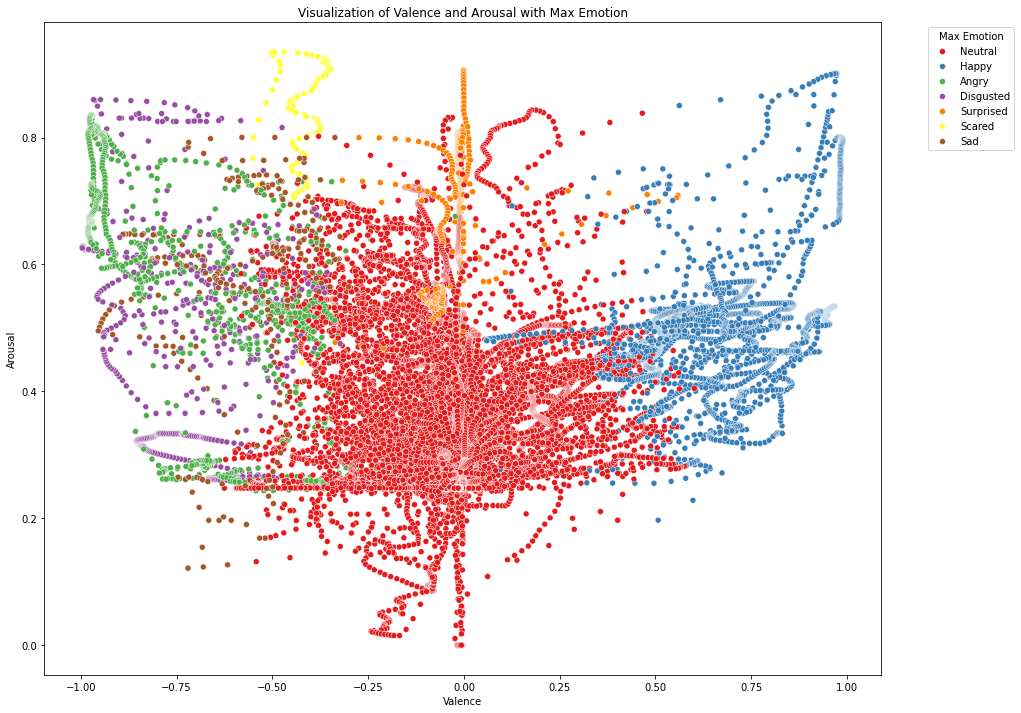

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Выборка двух признаков и семи эмоциональных состояний
features = df_clear[['Valence', 'Arousal']]
emotions = df_clear[['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted']]

# Определение максимального эмоционального состояния для каждого наблюдения
max_emotion = emotions.idxmax(axis=1)

# Визуализация
plt.figure(figsize=(15, 12))
sns.scatterplot(x=features['Valence'], y=features['Arousal'], hue=max_emotion, palette='Set1')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Visualization of Valence and Arousal with Max Emotion')
plt.legend(title='Max Emotion', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


На графике представлена Visualization of Valence and Arousal with Max Emotion. Как видно из графика, признаки эмоций не плохо разделимы и представляют из себя кластеры


вывод: Возможно KKN так же будет хорошей моделью

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


# X = df_clear[pa_fields]
# y = df_clear[emotion_columns]

# X = df_clear[emotion_columns]
# y = df_clear[pa_fields]

X = df_clear[action_unit_features]
y = df_clear[seven_fields]

# X = df_clear[seven_fields]
# y = df_clear[action_unit_features]

# X = df_clear[action_unit_features]
# y = df_clear[pa_fields]

# X = df_clear[pa_fields]
# y = df_clear[action_unit_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Обучить модели, но без задания сетки параметров (все дефолтные) + вывести табличку

In [19]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline


# Обновление списка моделей для сравнения с использованием MultiOutputRegressor
models = [
    ('Linear Regression', MultiOutputRegressor(LinearRegression())),
    ('Ridge', MultiOutputRegressor(Ridge())),
    ('Lasso', MultiOutputRegressor(Lasso())),
    ('Random Forest', MultiOutputRegressor(RandomForestRegressor())),
    ('KNN', MultiOutputRegressor(KNeighborsRegressor()))
]

# models.extend([
#     ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=6), LinearRegression())),
#     ('MLPRegressor', MultiOutputRegressor(MLPRegressor(random_state=42)))
# ])

results = pd.DataFrame(columns=['Model', 'MSE', 'MAE'])

for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results = results.append({'Model': name, 'MSE': mse, 'MAE': mae}, ignore_index=True)


results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results = results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

results

/tmp/ipykernel_224096/981777458.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': mse, 'MAE': mae}, ignore_index=True)
/tmp/ipykernel_224096/981777458.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': mse, 'MAE': mae}, ignore_index=True)
/tmp/ipykernel_224096/981777458.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': mse, 'MAE': mae}, ignore_index=True)
/tmp/ipykernel_224096/981777458.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': m

,Model,MSE,MAE,R2
0,Linear Regression,0.014231,0.066857,0.289288
1,Ridge,0.014231,0.06687,0.289292
2,Lasso,0.026426,0.087998,-0.000279
3,Random Forest,0.004416,0.023056,0.693854
4,KNN,0.004685,0.02379,0.666588


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

def perform_grid_search(model, params, name):
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    del grid_search
    del best_model
    return {'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'Best Params': best_params}

grid_models = [
    (MultiOutputRegressor(LinearRegression()), {}, 'Linear Regression'),
    (MultiOutputRegressor(Ridge()), {'estimator__alpha': [0.1, 1, 10]}, 'Ridge'),
    (MultiOutputRegressor(Lasso()), {'estimator__alpha': [0.1, 1, 10]}, 'Lasso'),
    (MultiOutputRegressor(RandomForestRegressor(random_state=42)),
     {'estimator__n_estimators': [10, 50, 100], 'estimator__max_depth': [None, 3, 5, 10, 20]}, 'Random Forest'),
#     (MultiOutputRegressor(KNeighborsRegressor()),
#      {'estimator__n_neighbors': [3, 5, 7, 20], 'estimator__weights': ['uniform', 'distance']}, 'KNN')
    ]

grid_models.extend([
#         (MultiOutputRegressor(KNeighborsRegressor()),
#      {'estimator__n_neighbors': [3, 5, 7, 20], 'estimator__weights': ['uniform', 'distance']}, 'KNN')
#         (make_pipeline(PolynomialFeatures(), LinearRegression()),
#      {'polynomialfeatures__degree': [2, 3, 5, 6]}, 'Polynomial Regression'),
    (MultiOutputRegressor(DummyRegressor(strategy="mean")), {}, 'Dummy Mean'),
#     (MultiOutputRegressor(MLPRegressor(random_state=42)),
#      {'estimator__hidden_layer_sizes': [(6, 3), (6, 5, 4), (6, 5, 3),(6, 5, 4, 3),
# #                                         (100, 50, 30, 10, 5, 10, 30, 50, 100),
# #                                         (50, 10, 5, 10, 50),
# #                                         (10, 5, 5, 2, 5, 5, 10)
#                                        ], 'estimator__alpha': [0.001, 0.01]}, 'MLPRegressor')
])

grid_results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Best Params'])

    for model, params, name in grid_models:
        print(name)
        result = perform_grid_search(model, params, name)
        grid_results = grid_results.append(result, ignore_index=True)

grid_results

Linear Regression


/tmp/ipykernel_3367/2294876448.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_results = grid_results.append(result, ignore_index=True)


Ridge


/tmp/ipykernel_3367/2294876448.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_results = grid_results.append(result, ignore_index=True)


Lasso


/tmp/ipykernel_3367/2294876448.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_results = grid_results.append(result, ignore_index=True)


Random Forest


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Dummy Mean


/tmp/ipykernel_3367/2294876448.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_results = grid_results.append(result, ignore_index=True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
/home/ivan/Рабочий ст

,Model,MSE,MAE,R2,Best Params
0,Linear Regression,0.007074,0.041779,0.673049,{}
1,Ridge,0.007196,0.042227,0.665992,{'estimator__alpha': 0.1}
2,Lasso,0.026426,0.087998,-0.000279,{'estimator__alpha': 0.1}
3,Random Forest,0.002452,0.017609,0.89218,"{'estimator__max_depth': 20, 'estimator__n_est..."
4,Dummy Mean,0.026426,0.087998,-0.000279,{}


### 2 -> 7
|index|Model|MSE|MAE|R2|Best Params|
|---|---|---|---|---|---|
|0|Linear Regression|0\.014231363144096676|0\.06685716965965018|0\.28928845570331074|\{\}|
|1|Polynomial Regression|0\.005765|0\.033479|0\.604517|\{'polynomialfeatures\_\_degree': 10\}|
|2|Ridge|0\.01423131542501588|0\.06685848248059326|0\.289288887371038|\{'estimator\_\_alpha': 0\.1\}|
|3|Lasso|0\.026425582732732666|0\.08799832359070096|-0\.00027931194956222683|\{'estimator\_\_alpha': 0\.1\}|
|4|Random Forest|0\.004372570365817908|0\.025274986796753284|0\.6965616813015547|\{'estimator\_\_max\_depth': 10, 'estimator\_\_n\_estimators': 100\}|
|5|KNN|0\.0045087320266298525|0\.024511006696384376|0\.6786213790832598|\{'estimator\_\_n\_neighbors': 20, 'estimator\_\_weights': 'distance'\}|
|6|MLPRegressor|0\.006112980840382319|0\.03230793801784232|0\.5706860921955135|\{'estimator\_\_alpha': 0\.001, 'estimator\_\_hidden\_layer\_sizes': \(50, 30, 10, 30, 50\)\}|
|7|Dummy Mean|0\.026425582732732666|0\.08799832359070096|-0\.00027931194956222683|\{\}|

### 7 -> 2

|index|Model|MSE|MAE|R2|Best Params|
|---|---|---|---|---|---|
|0|Linear Regression|0\.0050531164733499945|0\.04210653819486895|0\.7796914276193522|\{\}|
|1|Polynomial Regression|0\.003173|0\.03158|0\.847046|\{'polynomialfeatures\_\_degree': 3\}|
|2|Ridge|0\.00505342877766575|0\.042118320643883524|0\.7796928679717524|\{'estimator\_\_alpha': 0\.1\}|
|3|Lasso|0\.057843928782936045|0\.14890406312684706|-0\.00042376877700867066|\{'estimator\_\_alpha': 0\.1\}|
|4|Random Forest|0\.00041940157425521734|0\.006948190462686734|0\.9806665341401938|\{'estimator\_\_max\_depth': None, 'estimator\_\_n\_estimators': 100\}|
|5|KNN|0\.001583903544405107|0\.013406871360964762|0\.9240468274676383|\{'estimator\_\_n\_neighbors': 3, 'estimator\_\_weights': 'distance'\}|
|6|MLPRegressor|0\.003561096949626395|0\.031622808721073425|0\.827583387266567|\{'estimator\_\_alpha': 0\.001, 'estimator\_\_hidden\_layer\_sizes': \(100, 50, 30, 10, 5, 10, 30, 50, 100\)\}|
|7|Dummy Mean|0\.057843928782936045|0\.14890406312684706|-0\.00042376877700867066|\{\}|

### 42->7
|index|Model|MSE|MAE|R2|Best Params|
|---|---|---|---|---|---|
|0|Linear Regression|0\.007073969938348316|0\.04177928716292476|0\.6730493378140451|\{\}|
|1|Polynomial Regression|36\.04433645616122|0\.10867518928935778|-1444\.560668535929|\{'polynomialfeatures\_\_degree': 2\}|
|2|Ridge|0\.007196395700211569|0\.04222744601682432|0\.6659922981339843|\{'estimator\_\_alpha': 0\.1\}|
|3|Lasso|0\.026425582732732666|0\.08799832359070096|-0\.00027931194956222683|\{'estimator\_\_alpha': 0\.1\}|
|4|Random Forest|0\.002452008561951029|0\.017609323330822668|0\.892180111350836|\{'estimator\_\_max\_depth': 20, 'estimator\_\_n\_estimators': 100\}|
|5|KNN|0\.002478843932126611|0\.015883518401068036|0\.8903761027872227|\{'estimator\_\_n\_neighbors': 3, 'estimator\_\_weights': 'distance'\}|
|6|MLPRegressor|0\.003707115306586063|0\.02813363829109431|0\.8158216010176691|\{'estimator\_\_alpha': 0\.001, 'estimator\_\_hidden\_layer\_sizes': \(50, 30, 10, 30, 50\)\}|
|7|Dummy Mean|0\.026425582732732666|0\.08799832359070096|-0\.00027931194956222683|\{\}|

In [14]:
grid_results_facs_seven

,Model,MSE,MAE,R2,Best Params
0,Linear Regression,0.007074,0.041779,0.673049,{}
1,Ridge,0.007196,0.042227,0.665992,{'estimator__alpha': 0.1}
2,Lasso,0.026426,0.087998,-0.000279,{'estimator__alpha': 0.1}
3,Random Forest,0.002452,0.017609,0.89218,"{'estimator__max_depth': 20, 'estimator__n_est..."
4,Dummy Mean,0.026426,0.087998,-0.000279,{}


In [6]:
grid_results_seven_pa

,Model,MSE,MAE,R2,Best Params
0,Linear Regression,0.005053,0.042107,0.779691,{}
1,Ridge,0.005053,0.042118,0.779693,{'estimator__alpha': 0.1}
2,Lasso,0.057844,0.148904,-0.000424,{'estimator__alpha': 0.1}
3,Random Forest,0.000419,0.006948,0.980667,"{'estimator__max_depth': None, 'estimator__n_e..."
4,KNN,0.001584,0.013407,0.924047,"{'estimator__n_neighbors': 3, 'estimator__weig..."
5,Dummy Mean,0.057844,0.148904,-0.000424,{}


In [34]:
grid_results_pa_seven

,Model,MSE,MAE,R2,Best Params
0,Linear Regression,0.014231,0.066857,0.289288,{}
1,Polynomial Regression,0.005765,0.033479,0.604517,{'polynomialfeatures__degree': 10}
2,Ridge,0.014231,0.066858,0.289289,{'estimator__alpha': 0.1}
3,Lasso,0.026426,0.087998,-0.000279,{'estimator__alpha': 0.1}
4,Random Forest,0.004373,0.025275,0.696562,"{'estimator__max_depth': 10, 'estimator__n_est..."
5,KNN,0.004509,0.024511,0.678621,"{'estimator__n_neighbors': 20, 'estimator__wei..."
6,MLPRegressor,0.006983,0.037889,0.495148,"{'estimator__alpha': 0.01, 'estimator__hidden_..."
7,Dummy Mean,0.026426,0.087998,-0.000279,{}


In [ ]:
import joblib

best_model_name = grid_results.sort_values(by='R2').iloc[-1]['Model']
best_model = [model for model, params, name in grid_models if name == best_model_name][0]
print(best_model_name)
best_model.fit(X_train, y_train)

joblib.dump(best_model, f'7->42 best_model {best_model_name}.joblib')

loaded_model = joblib.load(f'7->42 best_model {best_model_name}.joblib')

#Использование загруженной модели для предсказаний или других операций
y_pred = loaded_model.predict(X_test)


Random Forest


[ 3.04734723e-01  5.42138429e-02  4.68259222e-01 -1.00045249e-01
  1.05978467e-01 -1.50722585e+00  5.89668346e-03 -1.35469891e-01
 -3.15233057e-02  7.43041460e-02  5.82788489e+01 -3.16500115e-02
  3.63990755e-07  1.81123495e+05  2.77894182e-02  1.78553892e-02
  3.18865429e-02 -3.75962583e-02  2.54754603e-07  2.28257687e-01
 -4.37554129e-02 -6.74944318e-02 -2.26863619e-01  5.79977060e-02
  1.31311713e-02  1.53553467e-02  4.88163017e-03 -4.25812903e-03
 -5.83129418e+01  1.15543827e-01 -2.56254047e-01 -2.72326326e-01
 -5.48739541e-02 -2.79601357e-01  8.41209464e-02 -1.10575897e-01
  1.52357562e+00 -6.34677952e-03 -8.91280360e-02  6.44072652e-02
 -1.81123575e+05  2.48491171e-02]


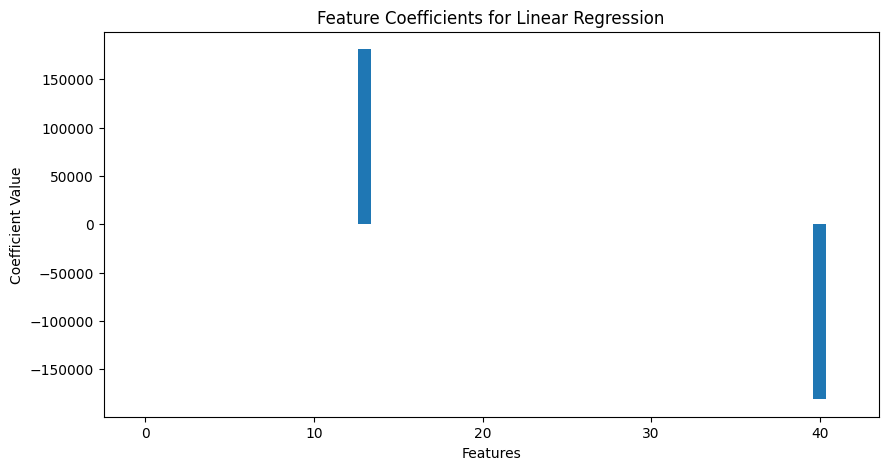

[ 0.11194023 -0.00344004  0.07616424 -0.03477067  0.0083098  -0.0016629
  0.01112506 -0.02513058 -0.01689675  0.02467063 -0.00180808 -0.03282044
  0.         -0.01147806  0.03691205  0.01872281  0.02717853 -0.03726951
  0.         -0.00445955 -0.0096021  -0.01469732  0.0042198   0.07133134
  0.01065878  0.0143069  -0.00444552  0.03278572 -0.00180213 -0.01981747
 -0.010619   -0.10839003 -0.03068947 -0.11720379  0.02479077 -0.00748499
  0.01187931 -0.0132633  -0.05685937  0.02850351 -0.01147806  0.01204991]


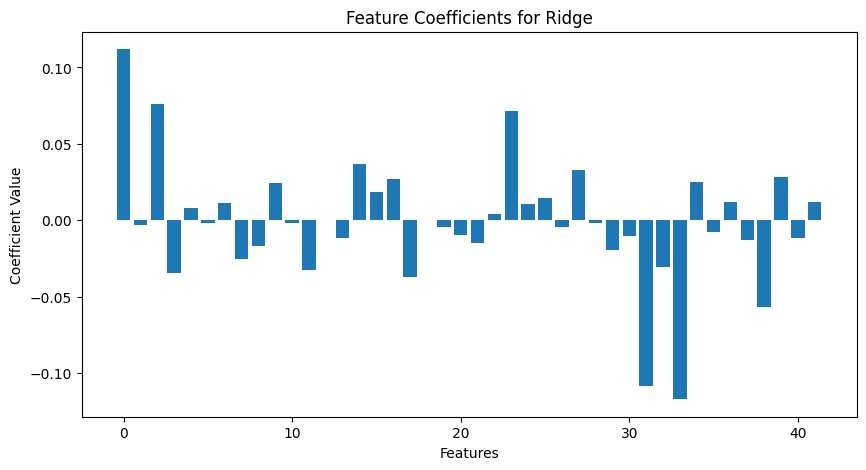

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


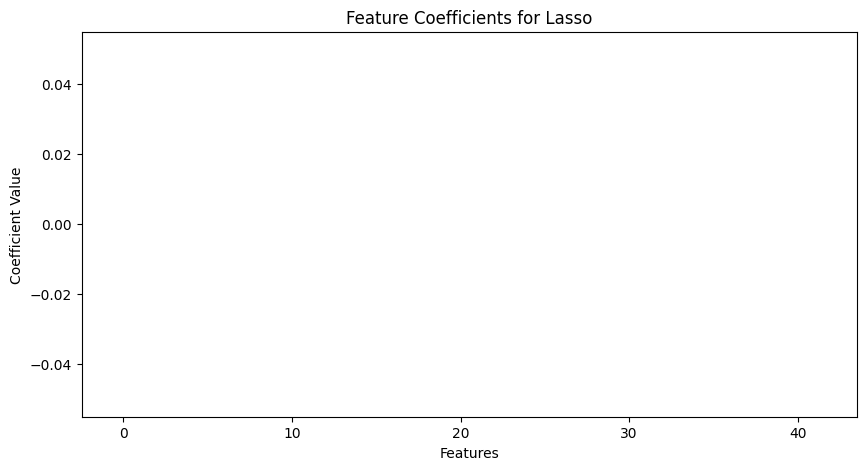

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Обучение моделей и извлечение коэффициентов
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Ridge': MultiOutputRegressor(Ridge(alpha=0.1)),  # Пример значения alpha для Ridge
    'Lasso': MultiOutputRegressor(Lasso(alpha=0.1))   # Пример значения alpha для Lasso
}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Извлечение и усреднение коэффициентов для MultiOutputRegressor
    if isinstance(model, MultiOutputRegressor):
        coefficients = np.mean([est.coef_ for est in model.estimators_], axis=0)
    else:
        coefficients = model.coef_

    # Визуализация коэффициентов
    plt.figure(figsize=(10, 5))
    print(coefficients)
    plt.bar(range(coefficients.shape[0]), coefficients)  # Визуализация для первого выхода
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title(f'Feature Coefficients for {name}')
    plt.show()


[-5.80000000e-01  9.30000000e-01 -1.70000000e+00  4.10000000e-01
 -7.25000000e+00 -6.85000000e+00 -8.10000000e-01 -4.59000000e+00
 -1.16000000e+00 -2.28000000e+00  1.43170000e+02 -3.60000000e-01
  0.00000000e+00  1.74738263e+06  3.40000000e-01 -3.50000000e-01
 -3.90000000e-01 -5.00000000e-01  0.00000000e+00  1.26000000e+00
  1.70000000e+00 -1.70000000e+00 -2.14000000e+00 -1.06000000e+00
 -1.54000000e+00  4.50000000e-01 -8.00000000e-02  1.67000000e+00
 -1.43150000e+02  6.40000000e-01 -1.69000000e+00 -1.05000000e+00
  1.60000000e-01  3.41000000e+00  1.60000000e-01  8.27000000e+00
  5.80000000e+00  2.00000000e-01  1.19000000e+00 -6.40000000e-01
 -1.74738284e+06  2.70000000e-01]


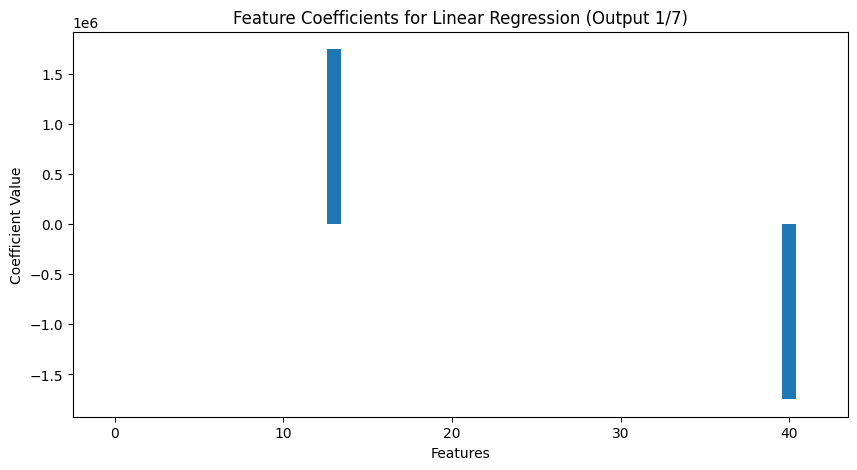

[ 1.1300000e+00  3.6000000e-01 -3.0200000e+00 -1.0200000e+00
 -2.0100000e+00  1.3300000e+00  4.0000000e-02 -1.1700000e+00
  2.8400000e+00  2.8600000e+00 -2.3881000e+02 -5.0000000e-02
 -0.0000000e+00 -4.7105861e+05  1.4000000e-01 -3.0000000e-02
  3.3000000e-01 -2.2000000e-01 -0.0000000e+00 -1.0100000e+00
 -3.9000000e-01 -2.4000000e-01  1.8600000e+00  3.5000000e-01
  1.6200000e+00  2.4000000e-01 -1.8000000e-01 -1.6100000e+00
  2.3890000e+02 -3.4000000e-01  6.2000000e-01 -8.6000000e-01
 -3.4000000e-01  1.0900000e+00  7.5000000e-01  1.0300000e+00
 -1.5400000e+00 -1.7600000e+00 -1.7400000e+00 -3.0000000e-02
  4.7105875e+05  3.9000000e-01]


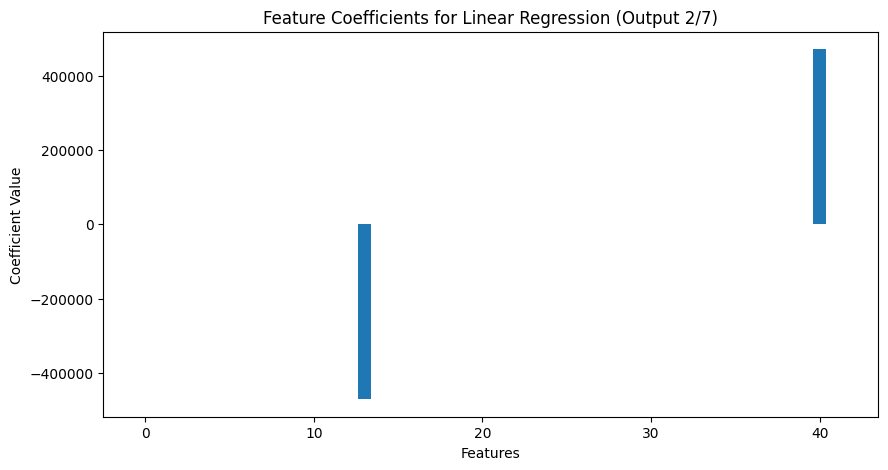

[-1.6200000e+00  1.4000000e-01  4.4800000e+00  2.5000000e-01
  6.0000000e-02 -2.0300000e+00 -2.3000000e-01  4.0000000e-02
  5.0000000e-02  6.0000000e-02  2.2872500e+03  3.3000000e-01
  0.0000000e+00  3.2003657e+05 -1.8000000e-01 -1.1000000e-01
  0.0000000e+00 -3.0000000e-02  0.0000000e+00  3.0500000e+00
 -4.4000000e-01 -1.6000000e-01 -8.9000000e-01  2.0000000e-02
 -2.9000000e-01 -5.4000000e-01  1.2000000e-01 -3.0000000e-02
 -2.2882400e+03  1.8000000e-01 -2.7800000e+00  2.3100000e+00
 -1.7000000e-01 -3.5500000e+00 -3.9000000e-01  2.3000000e-01
  2.4200000e+00 -1.7000000e-01 -1.9000000e-01  1.7300000e+00
 -3.2003668e+05 -1.2000000e-01]


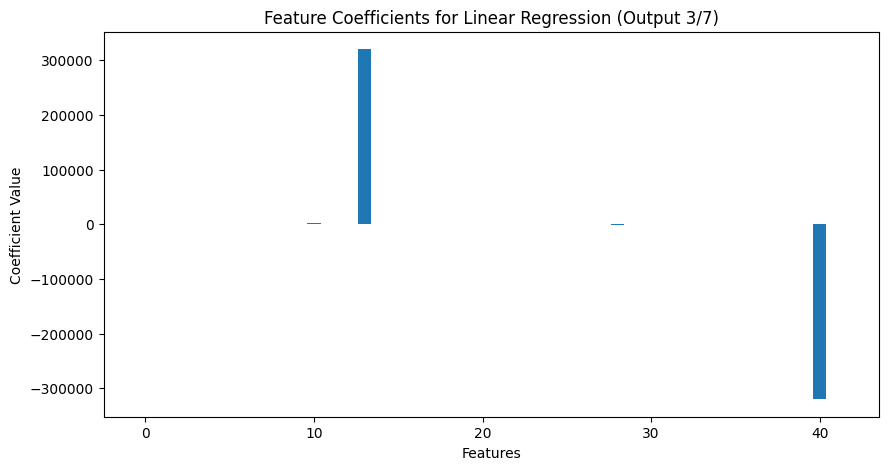

[-2.0300000e+00  4.5000000e-01  3.8600000e+00 -1.1100000e+00
 -1.6800000e+00 -6.8100000e+00 -5.4000000e-01 -2.2000000e-01
 -1.1500000e+00  8.0000000e-02  6.6016000e+02 -1.4000000e-01
  0.0000000e+00  6.5391277e+05  5.0000000e-02  5.4000000e-01
 -4.0000000e-02 -1.0000000e-02  0.0000000e+00  7.5000000e-01
 -1.9000000e-01 -3.8000000e-01 -9.1000000e-01  8.4000000e-01
 -8.6000000e-01  3.9000000e-01  2.2000000e-01 -2.6000000e-01
 -6.6008000e+02  8.5000000e-01 -1.3300000e+00  2.0300000e+00
 -3.0000000e-02 -2.7400000e+00  6.5000000e-01  2.4800000e+00
  7.4900000e+00  9.2000000e-01  3.4000000e-01  1.0000000e-01
 -6.5391344e+05  5.6000000e-01]


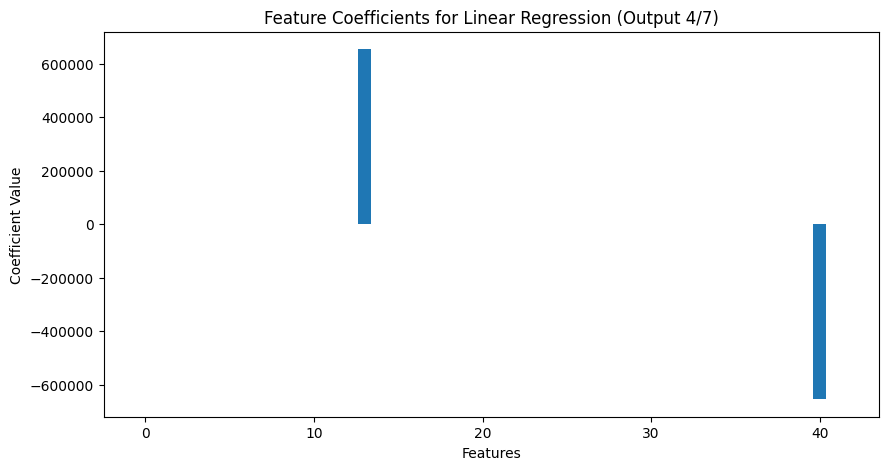

[ 5.3600000e+00 -1.1900000e+00 -6.8000000e-01  8.6000000e-01
 -8.6000000e-01 -1.8600000e+00  2.0000000e-02 -1.1600000e+00
 -1.6000000e-01  1.0000000e-01 -7.9260000e+02 -4.0000000e-02
 -0.0000000e+00 -5.6168545e+05  8.0000000e-02  1.0000000e-02
  2.2000000e-01  4.8000000e-01 -0.0000000e+00 -2.8400000e+00
 -8.0000000e-01  1.7200000e+00  4.9000000e-01  2.3000000e-01
  1.0000000e+00 -3.0000000e-02 -5.0000000e-02 -1.0000000e-02
  7.9287000e+02 -3.0000000e-01  2.5500000e+00 -4.6200000e+00
 -1.4000000e-01  1.4000000e-01 -6.7000000e-01 -1.4000000e-01
  1.8500000e+00  1.6000000e-01 -2.1000000e-01 -3.6000000e-01
  5.6168552e+05  3.3000000e-01]


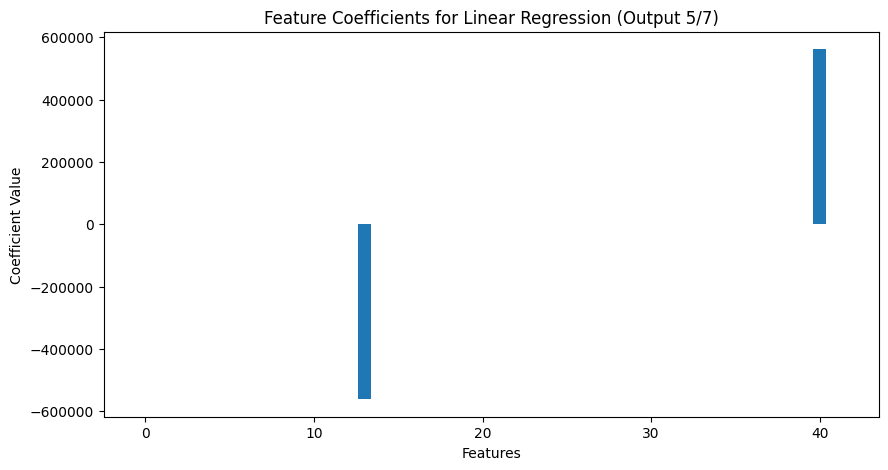

[-1.9000000e-01 -5.8000000e-01  2.9000000e-01  1.9000000e-01
 -3.8000000e-01 -3.0000000e-02 -1.0000000e-02 -6.1000000e-01
 -0.0000000e+00 -4.0000000e-02  2.6810000e+01  0.0000000e+00
  0.0000000e+00  4.5560770e+05 -2.0000000e-02 -1.0000000e-02
  1.2000000e-01  3.0000000e-02  0.0000000e+00  8.0000000e-02
 -7.0000000e-02  5.1000000e-01 -3.7000000e-01 -7.0000000e-02
  3.5000000e-01 -3.0000000e-02 -4.0000000e-02  4.0000000e-02
 -2.6830000e+01  5.5000000e-01 -1.2000000e-01  2.9000000e-01
  1.8000000e-01  9.0000000e-02 -7.0000000e-02  2.0000000e-02
  6.0000000e-02  3.0000000e-02 -1.0000000e-02  2.0000000e-02
 -4.5560774e+05  3.0000000e-02]


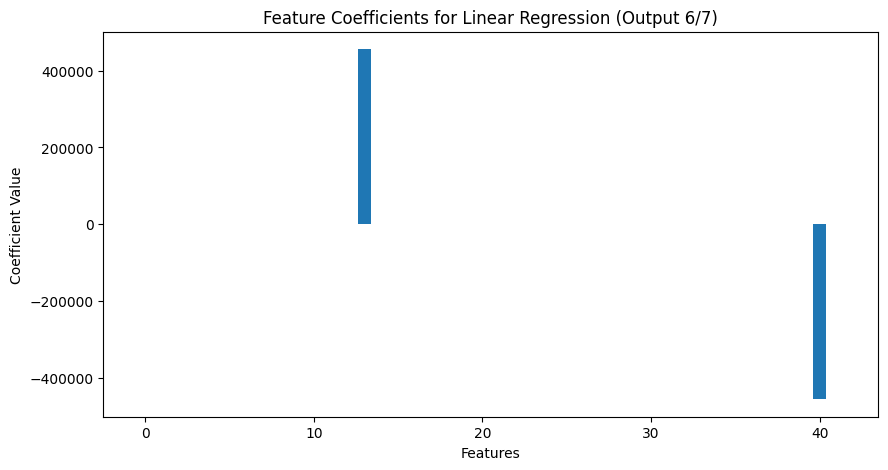

[ 6.0000000e-02  2.6000000e-01  4.0000000e-02 -2.9000000e-01
  1.2860000e+01  5.7000000e+00  1.5600000e+00  6.7500000e+00
 -6.4000000e-01 -2.6000000e-01 -1.6780300e+03  4.0000000e-02
 -0.0000000e+00 -8.7633115e+05 -2.2000000e-01  8.0000000e-02
 -1.0000000e-02 -2.0000000e-02 -0.0000000e+00  2.9000000e-01
 -1.1000000e-01 -2.3000000e-01  3.8000000e-01  8.0000000e-02
 -1.9000000e-01 -3.8000000e-01  5.0000000e-02  1.8000000e-01
  1.6783300e+03 -7.7000000e-01  9.4000000e-01 -0.0000000e+00
 -4.0000000e-02 -3.9000000e-01  1.6000000e-01 -1.2660000e+01
 -5.4000000e+00  5.7000000e-01 -0.0000000e+00 -3.6000000e-01
  8.7633139e+05 -1.2700000e+00]


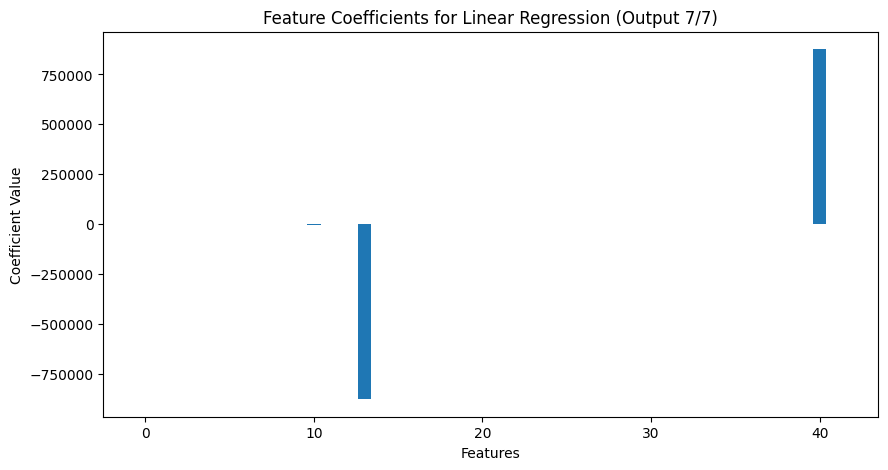

[-0.52 -0.3  -0.63  0.31 -0.45 -0.46 -0.83 -0.68 -0.54 -0.6  -0.06 -0.37
  0.   -0.01  0.34 -0.35 -0.39 -0.48  0.   -0.09  0.88 -0.51 -1.07 -0.88
 -0.82  0.23 -0.05  0.21 -0.06 -0.01 -0.14 -0.29  0.39  1.25  0.14  0.65
 -0.39 -0.41  0.41 -0.4  -0.01  0.07]


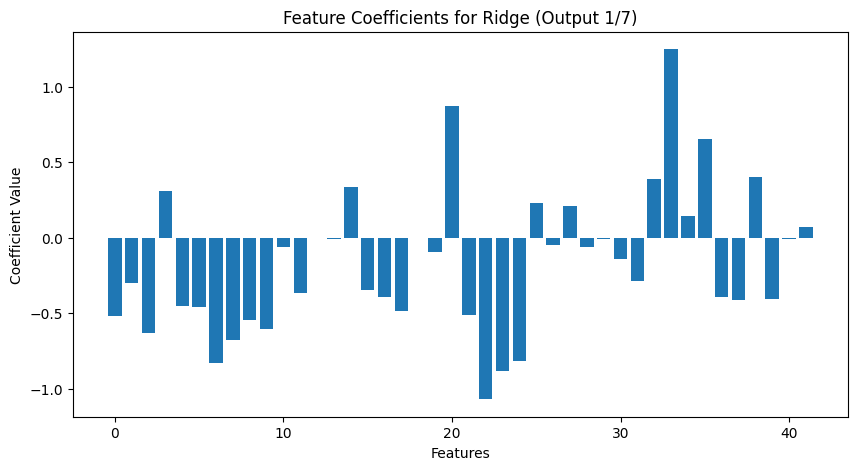

[ 0.27  0.08 -0.36 -0.28  0.05 -0.1   0.02 -0.15  0.69  0.89  0.02 -0.06
  0.    0.04  0.04 -0.01  0.27 -0.18  0.   -0.08 -0.16  0.03  0.22  0.24
  0.38  0.17 -0.1   0.03  0.02 -0.21 -0.07 -0.24 -0.24  0.07  0.09  0.15
 -0.08  0.34 -0.58  0.01  0.04  0.14]


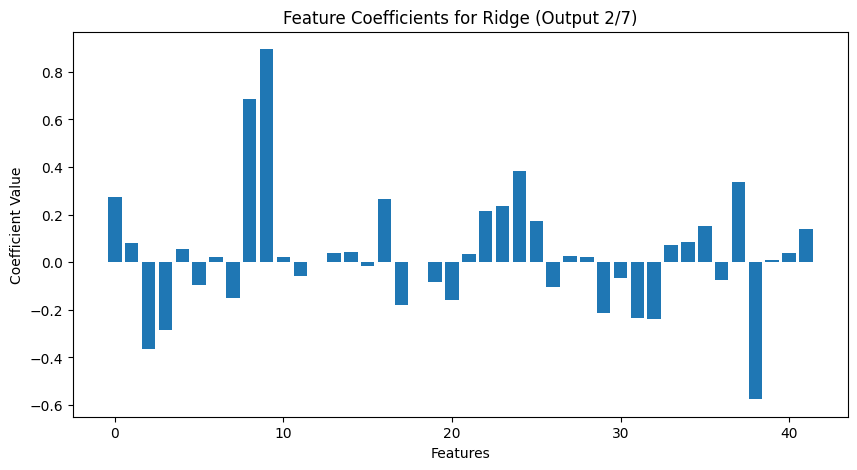

[-0.07  0.07  0.7  -0.06  0.01  0.13 -0.15 -0.01 -0.03 -0.04 -0.05  0.32
  0.   -0.02 -0.11 -0.09  0.01 -0.03  0.    0.1  -0.49 -0.09  0.3  -0.01
 -0.05 -0.45  0.04  0.03 -0.05  0.02  0.03  0.8  -0.17 -0.94 -0.09  0.05
  0.14 -0.02 -0.16  0.68 -0.02  0.02]


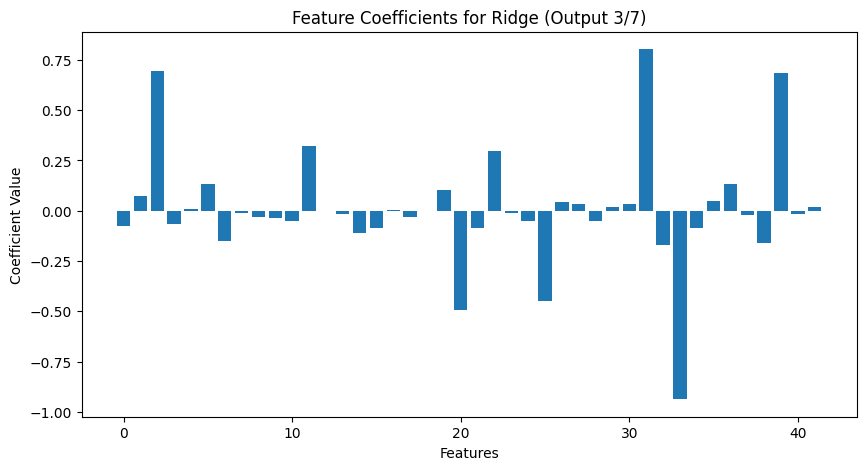

[-0.34  0.12  0.64 -0.4  -0.06  0.32 -0.46 -0.07 -0.15 -0.01  0.09 -0.13
  0.   -0.14  0.14  0.56 -0.03 -0.01  0.   -0.12 -0.43 -0.05  0.21  0.56
 -0.27  0.32  0.15 -0.14  0.09  0.06 -0.15  0.57  0.02 -0.63  0.1   0.27
  0.37 -0.02  0.28  0.02 -0.14  0.23]


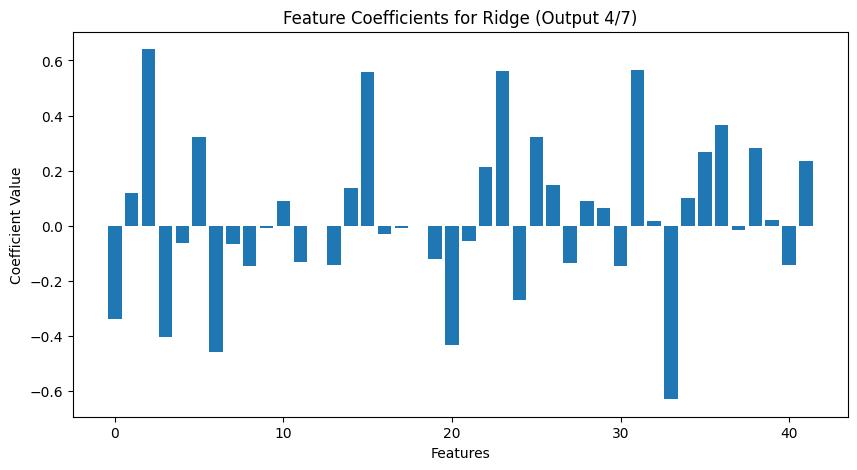

[ 1.47  0.03  0.12  0.24 -0.09 -0.06  0.01 -0.19 -0.01  0.03  0.02 -0.05
  0.    0.04  0.09  0.    0.18  0.46  0.   -0.07  0.22  0.52  0.31  0.61
  0.17 -0.   -0.04  0.04  0.02 -0.33 -0.01 -1.68 -0.3  -0.48 -0.09 -0.1
  0.   -0.   -0.17 -0.12  0.04  0.11]


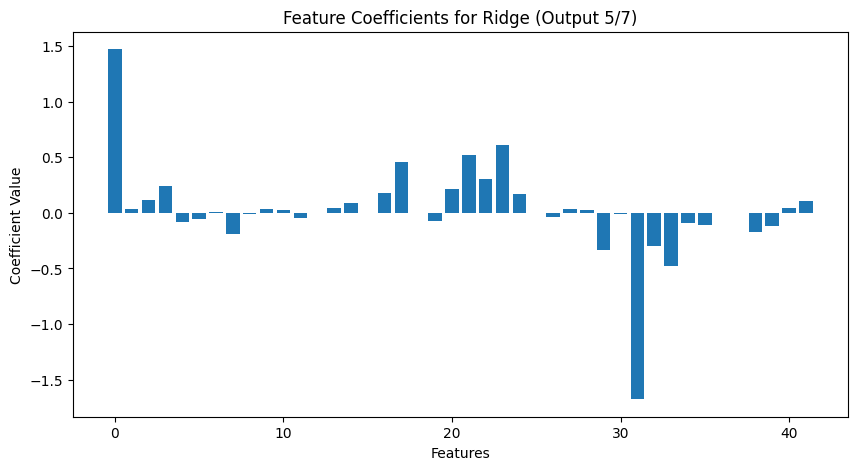

[-0.08 -0.09  0.02  0.1  -0.04  0.02 -0.02 -0.06  0.01 -0.02 -0.01  0.
  0.    0.04 -0.02 -0.01  0.11  0.03  0.   -0.01  0.    0.05 -0.09 -0.05
  0.05  0.   -0.03  0.01 -0.01  0.38 -0.01  0.1   0.05  0.08 -0.   -0.04
 -0.02  0.01 -0.02  0.01  0.04  0.01]


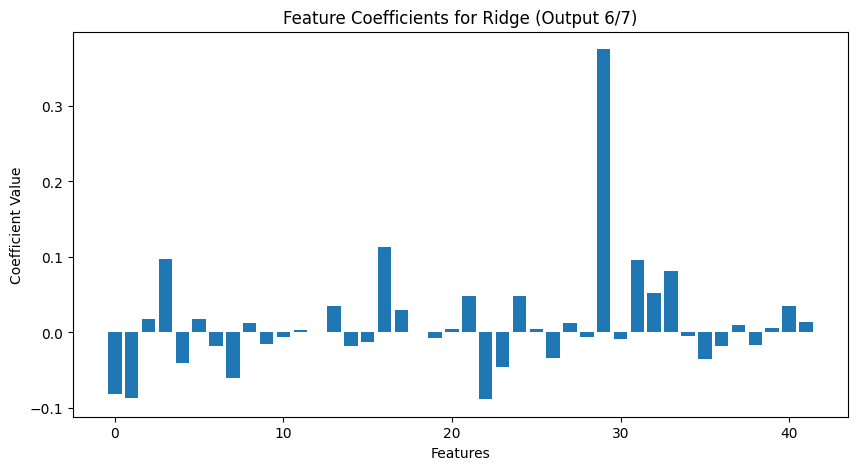

[ 0.05  0.06  0.06 -0.14  0.63  0.13  1.5   0.98 -0.09 -0.09 -0.03  0.05
  0.   -0.03 -0.22  0.04  0.05 -0.05  0.    0.24 -0.08 -0.05  0.15  0.03
  0.61 -0.17  0.01  0.05 -0.03 -0.04  0.26 -0.03  0.04 -0.17  0.03 -1.03
  0.06  0.01 -0.16  0.   -0.03 -0.51]


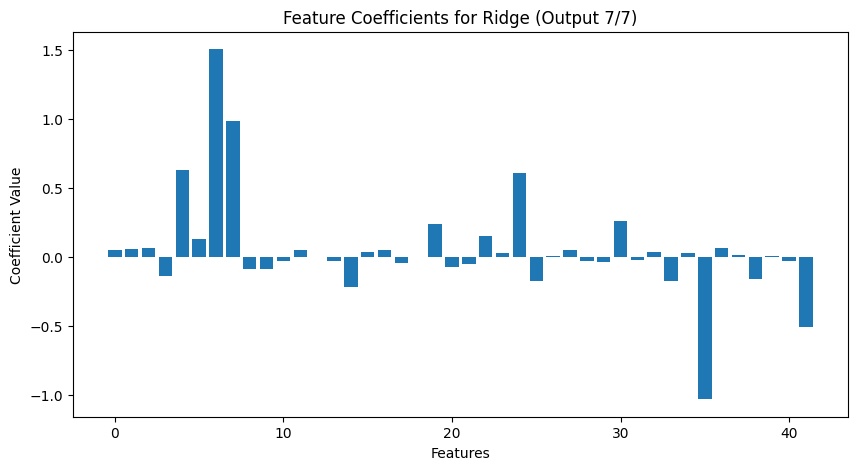

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.
  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.]


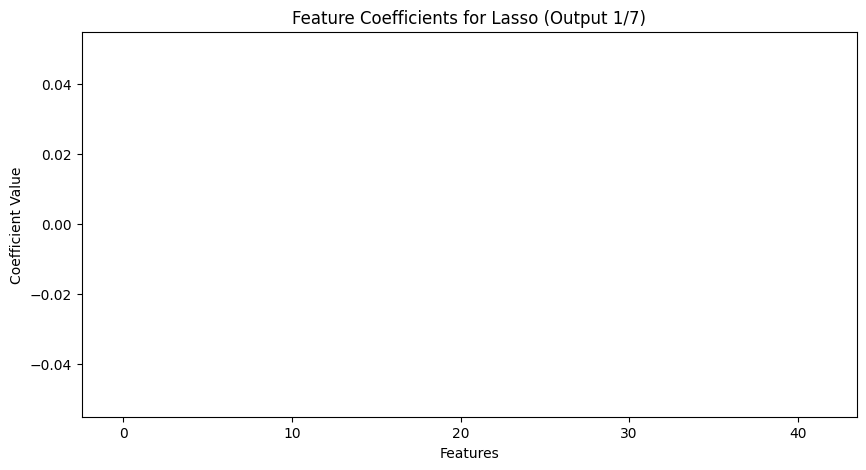

[-0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0.
  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0.  0. -0. -0. -0.]


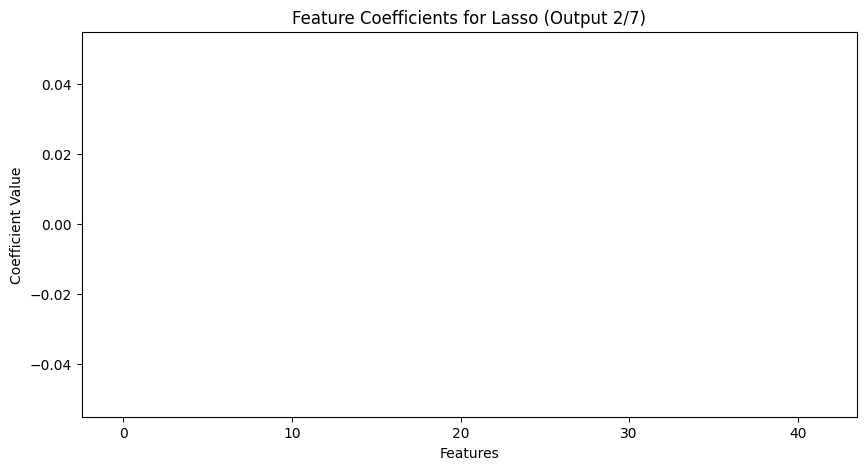

[ 0.  0.  0. -0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0.
  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0. -0.
  0. -0. -0.  0. -0.  0.]


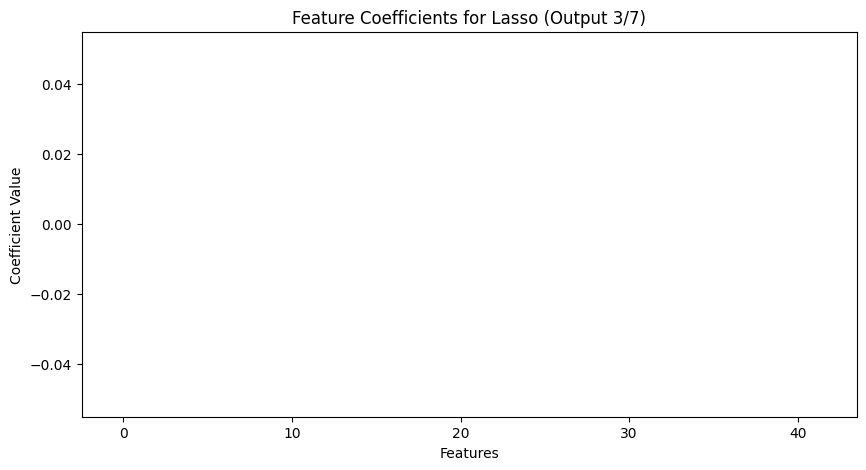

[-0. -0.  0.  0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0.
  0. -0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0.
  0. -0.  0. -0. -0. -0.]


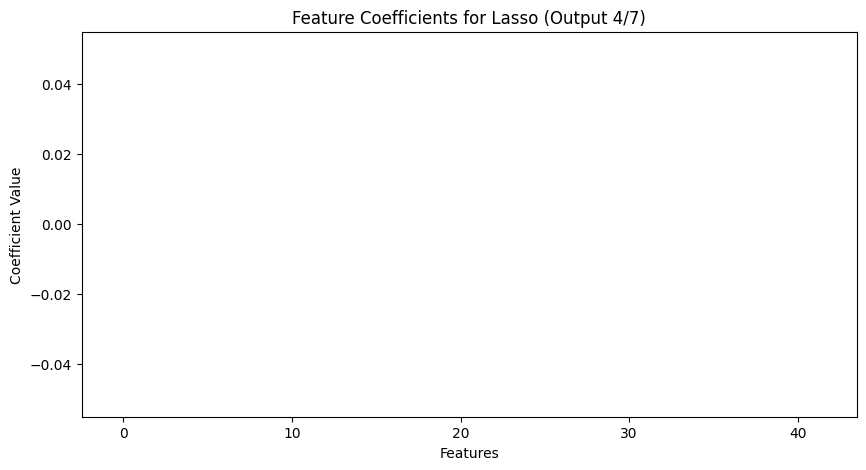

[ 0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0.  0.  0.
  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0.]


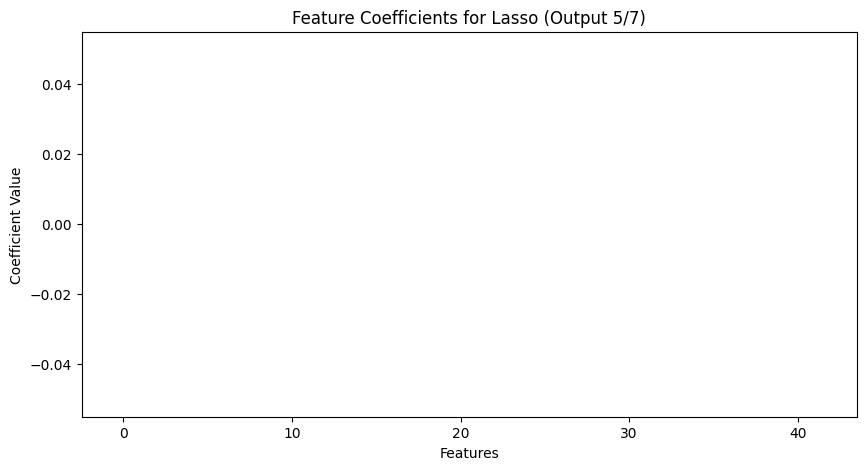

[ 0. -0.  0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0.
  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.
  0. -0. -0. -0.  0. -0.]


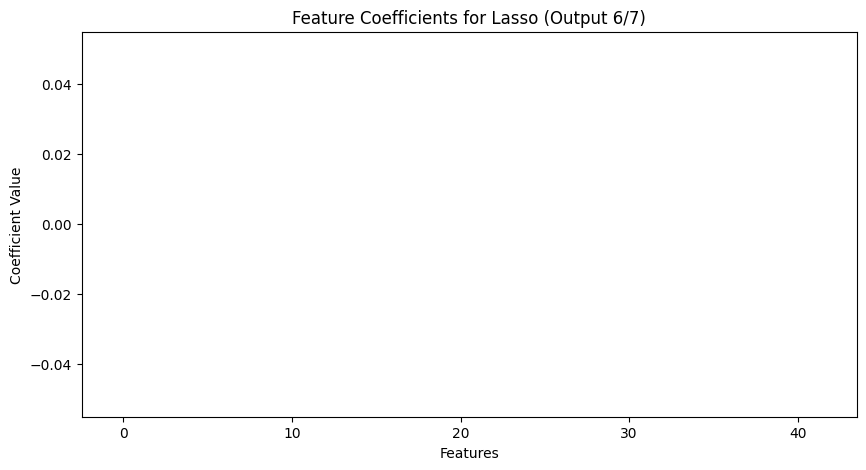

[-0. -0.  0. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.
  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.
  0. -0. -0. -0. -0.  0.]


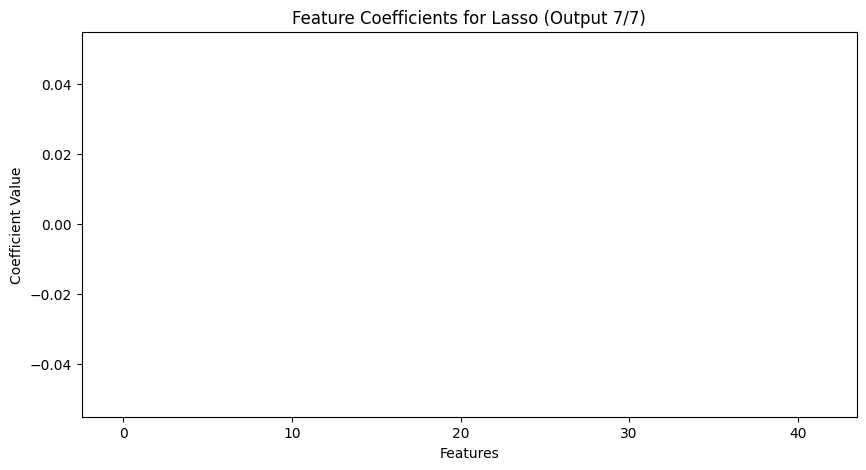

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Обучение моделей и извлечение коэффициентов
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Ridge': MultiOutputRegressor(Ridge(alpha=0.1)),  # Пример значения alpha для Ridge
    'Lasso': MultiOutputRegressor(Lasso(alpha=0.1))   # Пример значения alpha для Lasso
}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Извлечение коэффициентов для каждого целевого признака
    if isinstance(model, MultiOutputRegressor):
        coefficients = [est.coef_ for est in model.estimators_]
    else:
        coefficients = [model.coef_]

    # Визуализация коэффициентов для каждого целевого признака
    num_outputs = len(coefficients)
    for i, coef in enumerate(coefficients):
        print(np.round(coef, 2))
        plt.figure(figsize=(10, 5))
        plt.bar(range(coef.shape[0]), coef)  # Визуализация для текущего выхода
        plt.xlabel('Features')
        plt.ylabel('Coefficient Value')
        plt.title(f'Feature Coefficients for {name} (Output {i+1}/{num_outputs})')
        plt.show()


### интерпритация полиномиальной регрессии


['Valence' 'Arousal' 'Valence^2' 'Valence Arousal' 'Arousal^2'] [ 0.01845652 -1.01789073 -0.8010844  -0.05074101  0.13690535]


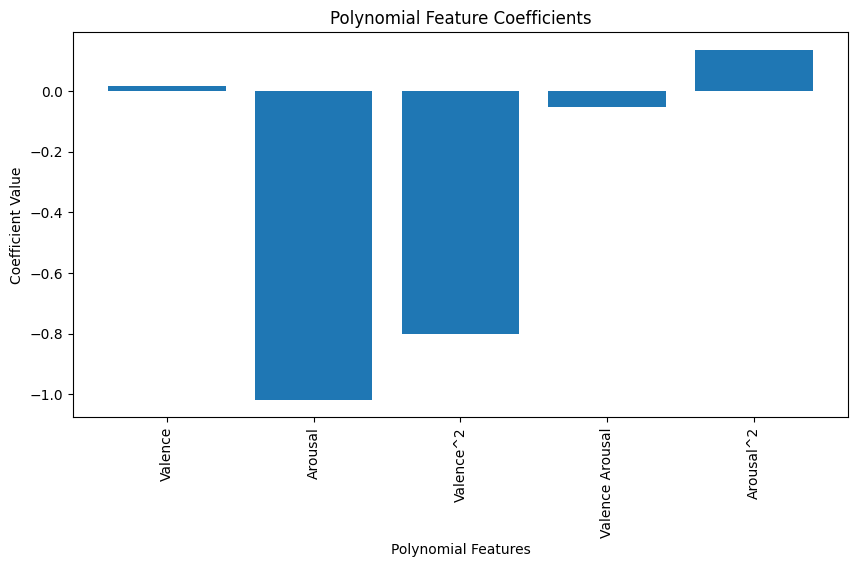

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Создание и обучение модели полиномиальной регрессии
degree = 2
poly_reg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg_model.fit(X_train, y_train)

# Получение коэффициентов и исключение свободного члена
linear_model = poly_reg_model.named_steps['linearregression']
coefficients = linear_model.coef_[0][1:]  # Исключение свободного члена

# Получение названий полиномиальных признаков и исключение константы
feature_names = poly_reg_model.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X_train.columns)[1:]

# Визуализация коэффициентов
plt.figure(figsize=(10, 5))
print(feature_names, coefficients)
plt.bar(feature_names, coefficients)
plt.xlabel('Polynomial Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.title('Polynomial Feature Coefficients')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Определение размера графика
plt.figure(figsize=(15, 10))

# Цикл по каждому эмоциональному состоянию для создания визуализации
for i, target_feature in enumerate(emotion_columns):
    # Обучение KNN модели для этого признака
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train[target_feature])

    # Создание сетки для визуализации
    x_min, x_max = X['Valence'].min() - 0.1, X['Valence'].max() + 0.1
    y_min, y_max = X['Arousal'].min() - 0.1, X['Arousal'].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Предсказание для каждой точки на сетке
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.subplot(3, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test['Valence'], X_test['Arousal'], c=y_test[target_feature], s=20, edgecolor='k')
    plt.title(f"KNN for '{target_feature}'")
    plt.xlabel('Valence')
    plt.ylabel('Arousal')

plt.tight_layout()
plt.show()



KeyError: 'Valence'

<Figure size 1500x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegress

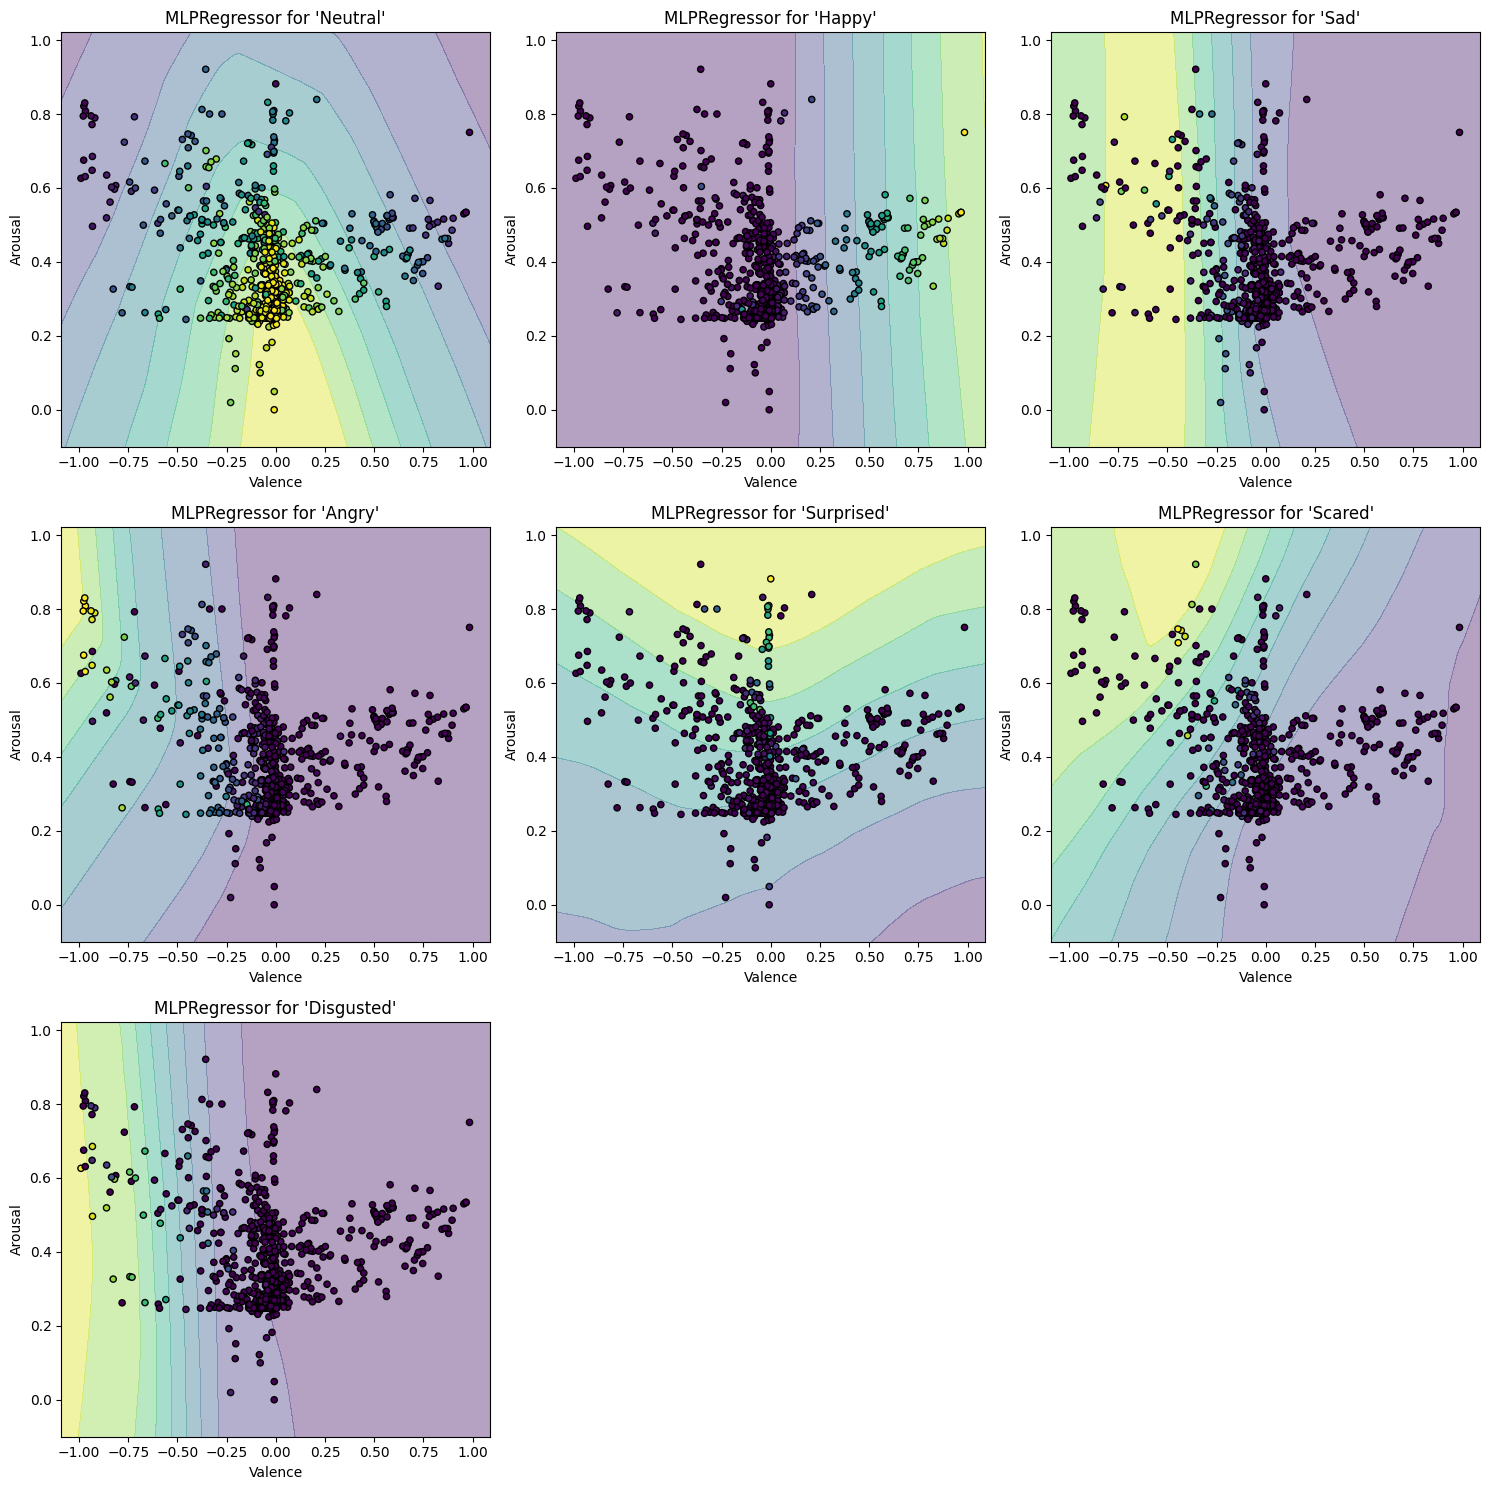

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

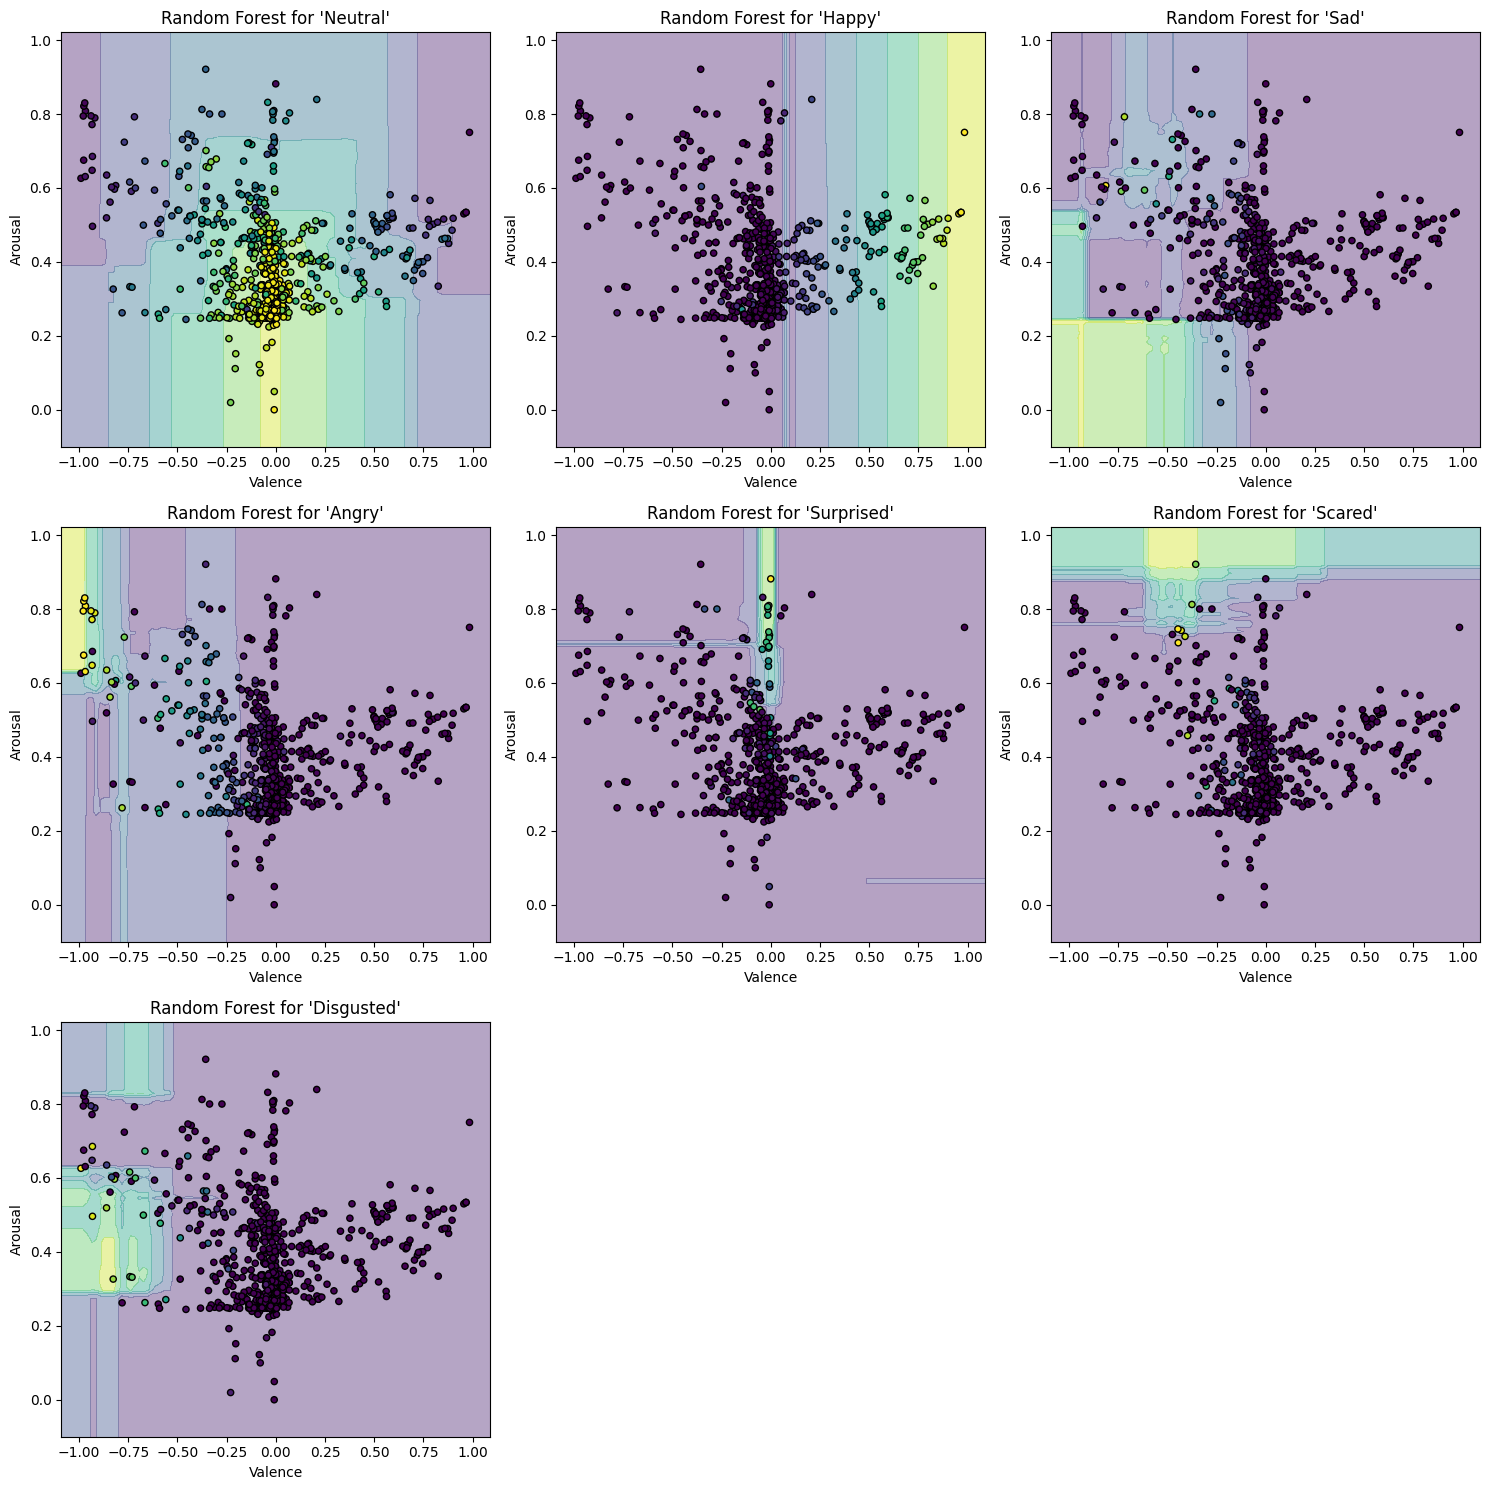

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

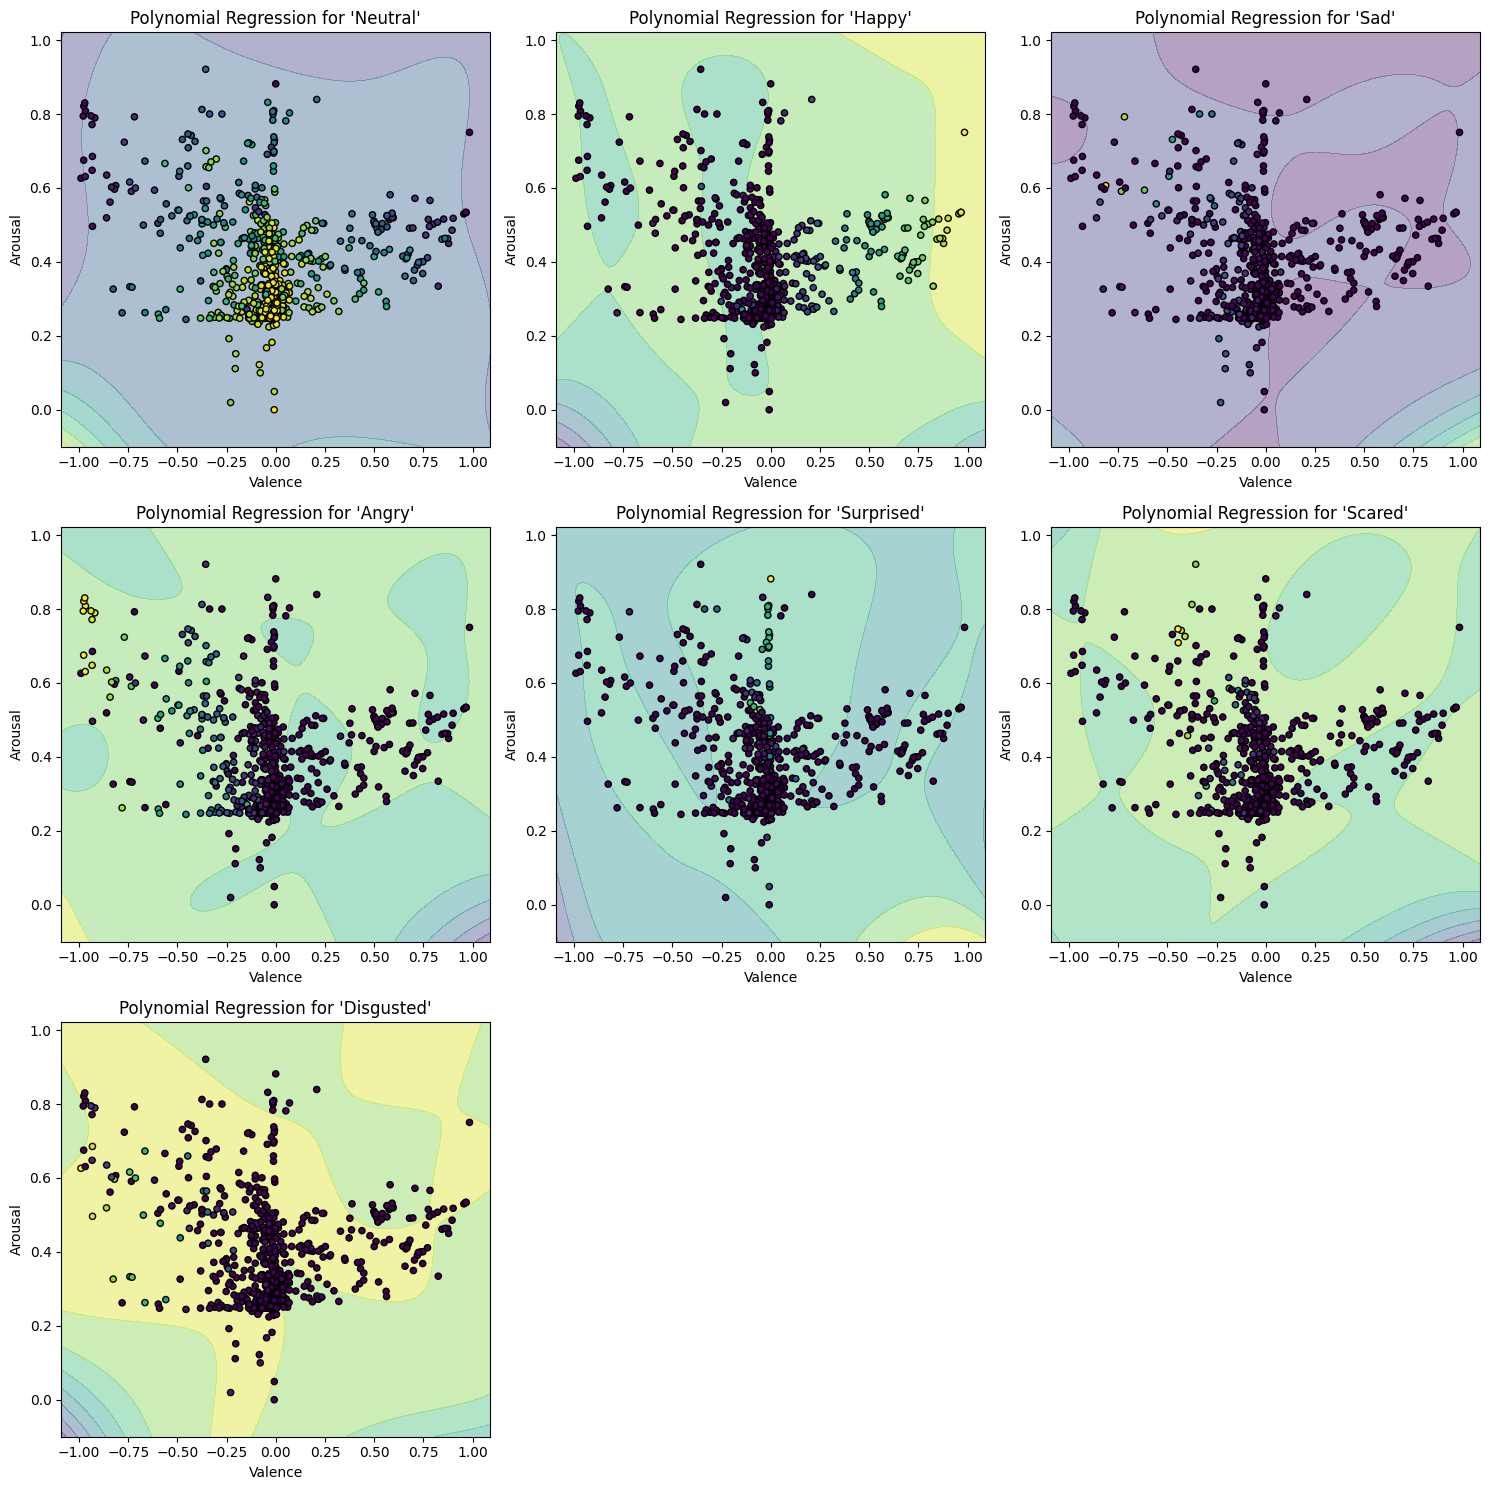

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

def plot_model_predictions(model, X_train,y_train, X_test, y_test, feature_names, target_features, name):
    # Определение размера графика
    plt.figure(figsize=(15, 15))
    model.fit(X_train, y_train)

    # Цикл по каждому эмоциональному состоянию для создания визуализации
    for i, target_feature in enumerate(target_features):
        # Обучение модели для всех признаков

        # Создание сетки для визуализации
        x_min, x_max = X['Valence'].min() - 0.1, X['Valence'].max() + 0.1
        y_min, y_max = X['Arousal'].min() - 0.1, X['Arousal'].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        # Предсказание для каждой точки на сетке
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:, i].reshape(xx.shape)

        # Визуализация
        plt.subplot(3, 3, i + 1)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X_test['Valence'], X_test['Arousal'], c=y_test[target_feature], s=20, edgecolor='k')
        plt.title(f"{name} for '{target_feature}'")
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])

    plt.tight_layout()
    plt.show()



# Извлечение лучших параметров для каждой модели
best_params_mlp = grid_results[grid_results['Model'] == 'MLPRegressor']['Best Params'].iloc[0]
mlp_params = {k.replace('estimator__', ''): v for k, v in best_params_mlp.items()}

# Извлечение лучших параметров для RandomForestRegressor
best_params_rf = grid_results[grid_results['Model'] == 'Random Forest']['Best Params'].iloc[0]
rf_params = {k.replace('estimator__', ''): v for k, v in best_params_rf.items()}

# Извлечение лучших параметров для Polynomial Regression
best_params_poly = grid_results[grid_results['Model'] == 'Polynomial Regression']['Best Params'].iloc[0]
poly_params = {k.replace('polynomialfeatures__', ''): v for k, v in best_params_poly.items()}

# Обучение и визуализация для каждой модели
models_to_plot = [
    ('MLPRegressor', MultiOutputRegressor(MLPRegressor(**mlp_params))),
    ('Random Forest', MultiOutputRegressor(RandomForestRegressor(**rf_params))),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(**poly_params), MultiOutputRegressor(LinearRegression())))
]

for name, model in models_to_plot:
    #model.fit(X_train, y_train)
    plot_model_predictions(model, X_train,y_train, X_test, y_test, ['Valence', 'Arousal'], emotion_columns, name)


In [ ]:
""

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsRegressor is expecting 7 features as input.

<Figure size 1500x1000 with 0 Axes>

### Введение

Целью данного научно-исследовательского проекта является исследование и разработка методов машинного обучения для анализа и преобразования эмоциональных состояний человека. В частности, основной задачей является создание эффективных алгоритмов для преобразования семи эмоциональных состояний (Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted) в двумерное пространство Valence и Arousal (pa_fields) и обратно. Это исследование имеет значительное прикладное значение, так как понимание эмоциональных состояний человека и их количественное выражение играют важную роль в различных областях, включая психологию, медицину, маркетинг и разработку пользовательских интерфейсов.

Работа включает анализ различных подходов к решению этой задачи, начиная от традиционных методов машинного обучения, таких как линейная и полиномиальная регрессия, до более сложных, например, случайных лесов и нейронных сетей. Ключевым аспектом исследования является не только достижение высокой точности прогнозов, но и понимание взаимосвязей между различными эмоциональными состояниями и их проекциями на двумерное пространство Valence-Arousal.

Особое внимание уделяется также обратным задачам, таким как преобразование из двумерного пространства обратно в семимерное пространство эмоциональных состояний, а также другим связанным преобразованиям (например, из 42-мерного пространства Facial Action Coding System в семимерное пространство эмоций). Эти задачи представляют собой сложные проблемы анализа данных, требующие применения продвинутых методов машинного обучения и тщательного анализа данных.

В результате данного исследования ожидается получение не только высокоэффективных моделей для задач преобразования, но и глубокого понимания взаимодействия различных эмоциональных состояний и их проекций, что может иметь значительные теоретические и практические последствия в области психологии и когнитивных наук.

### Методы

#### Описание Задачи
Задача, рассматриваемая в данном исследовании, является задачей мульти-выходной регрессии. Мульти-выходная регрессия (или мульти-таргет регрессия) — это тип задачи машинного обучения, где модель обучается предсказывать несколько непрерывных выходных переменных на основе одного или нескольких входных признаков.

Математически задачу можно сформулировать следующим образом:
- Дан набор входных данных \( X \), где каждый элемент \( x_i \in X \) представляет собой вектор входных признаков.
- Соответствующий набор выходных данных \( Y \), где каждый элемент \( y_i \in Y \) является вектором целевых переменных.
- Цель состоит в том, чтобы найти функцию \( f \), которая наилучшим образом отображает входные данные на выходные: \( f(x_i) \approx y_i \).

В контексте данной задачи:
- Входные данные (X): двумерное пространство 'Valence' и 'Arousal'.
- Выходные данные (Y): семь эмоциональных состояний ('Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted').

#### Выбор Моделей и Метрик
Для решения этой задачи были выбраны различные модели машинного обучения, включая линейную регрессию, полиномиальную регрессию, Ridge и Lasso регрессии, случайный лес, K-ближайших соседей (KNN) и многослойный перцептрон (MLPRegressor). Выбор этих моделей обусловлен их разнообразием и способностью к аппроксимации сложных зависимостей в данных.

Метрики, использованные для оценки моделей:
1. **Средняя квадратичная ошибка (MSE)**:
   \[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]
   Где \( y_i \) — истинное значение, \( \hat{y}_i \) — предсказанное значение, \( n \) — количество наблюдений. MSE измеряет средний квадрат разницы между истинными и предсказанными значениями, являясь индикатором точности модели.
   
2. **Средняя абсолютная ошибка (MAE)**:
   \[ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \]
   MAE аналогичен MSE, но измеряет среднюю абсолютную разницу, что делает её менее чувствительной к выбросам по сравнению с MSE.

3. **Коэффициент детерминации (R2)**:
   \[ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \]
   Где \( \bar{y} \) — среднее значение \( y \). R2 измеряет долю вариативности в зависимой переменной, которая объясняется независимыми переменными модели. Он показывает, насколько хорошо данные подходят для модели, относительно простого усреднения.

Эти метрики были выбраны для оценки точности и адекватности предсказаний моделей, а также их способности объяснять вариабельность данных.

### Результаты 7 -> 2

#### Общая Оценка Моделей
В рамках исследования были рассмотрены и оценены различные модели машинного обучения для задачи преобразования семи эмоциональных состояний (seven_fields) в двумерное пространство Valence и Arousal (pa_fields). Ниже представлены результаты этих моделей, оцененные с использованием метрик MSE, MAE и R2, а также определенные наилучшие параметры для каждой модели:

| Индекс | Модель | MSE | MAE | R2 | Лучшие параметры |
|--------|--------|-----|-----|----|-----------------|
| 0 | Линейная регрессия | 0.004808 | 0.04077 | 0.8026 | {} |
| 1 | Полиномиальная регрессия | 0.004114 | 0.03625 | 0.8107 | {'polynomialfeatures__degree': 2} |
| 2 | Ridge | 0.004791 | 0.04070 | 0.8029 | {'estimator__alpha': 0.1} |
| 3 | Lasso | 0.05923 | 0.1507 | -0.0011 | {'estimator__alpha': 0.1} |
| 4 | Случайный лес | 0.001817 | 0.02182 | 0.9213 | {'estimator__max_depth': 20, 'estimator__n_estimators': 100} |
| 5 | KNN | 0.002847 | 0.02792 | 0.8730 | {'estimator__n_neighbors': 7, 'estimator__weights': 'distance'} |
| 6 | MLPRegressor | 0.003816 | 0.03501 | 0.8237 | {'estimator__alpha': 0.001, 'estimator__hidden_layer_sizes': (100, 50, 30, 10, 5, 10, 30, 50, 100)} |
| 7 | Dummy Mean | 0.05923 | 0.1507 | -0.0011 | {} |

#### Анализ Линейной Регрессии
Для линейной регрессии коэффициенты модели показывают влияние каждого из семи эмоциональных состояний на предсказания Valence и Arousal. Коэффициенты модели следующие:
- Neutral: -0.2605
- Happy: 0.3668
- Sad: -0.5197
- Angry: -0.5239
- Surprised: 0.0378
- Scared: -0.1731
- Disgusted: -0.5703

Итоговая формула линейной регрессии для прогнозирования Valence и Arousal может быть представлена как:
\[ Valence, Arousal = -0.2605 \times Neutral + 0.3668 \times Happy - 0.5197 \times Sad - 0.5239 \times Angry + 0.0378 \times Surprised - 0.1731 \times Scared - 0.5703 \times Disgusted \]

#### Анализ Полиномиальной Регрессии
Полиномиальная регрессия с градусом 2 учитывает не только основные эмоциональные состояния, но и их взаимодействия. Коэффициенты полиномиальной регрессии указывают на более сложные зависимости между эмоциональными состояниями и пространством Valence-Arousal. Примерная формула с округленными коэффициентами:
\[ Valence, Arousal \approx 0.09 \times Neutral^2 + 1.08 \times Happy - 0.59 \times Sad - 0.75 \times Angry - 0.

004 \times Surprised - 0.55 \times Scared - 0.59 \times Disgusted + \ldots \]

#### Заключение
Модели машинного обучения показали различную эффективность в прогнозировании двумерного пространства Valence и Arousal на основе семи эмоциональных состояний. Случайный лес показал наилучшие результаты с точки зрения всех трех метрик, указывая на его превосходную способность к моделированию сложных нелинейных зависимостей в данных. Напротив, модели Lasso и Dummy Mean показали низкую производительность. Коэффициенты линейной и полиномиальной регрессии предоставили ценные инсайты о взаимосвязи между эмоциональными состояниями и их проекцией на пространство Valence-Arousal.

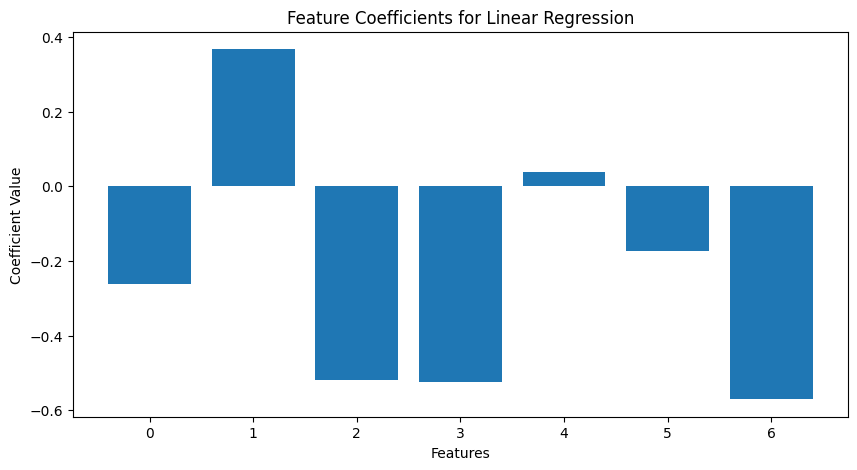

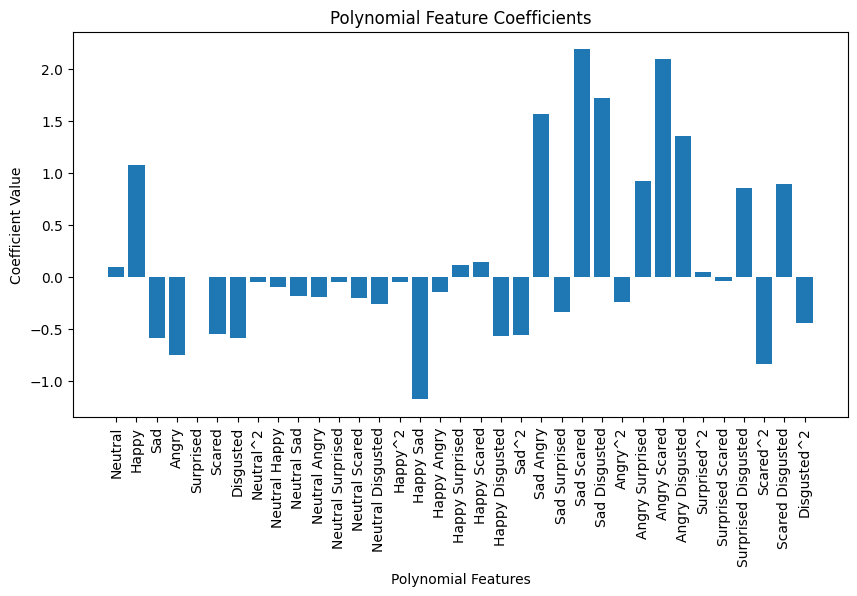

### Предварительный Анализ Данных

#### Анализ Главных Компонент (PCA)
Анализ главных компонент (PCA) был проведен для изучения структуры и взаимосвязей в данных, состоящих из семи эмоциональных состояний. Основная цель PCA в данном контексте - уменьшить размерность данных, сохраняя при этом максимальное количество информации.

1. **Объясненная Дисперсия для Двух Компонентов**: Первые две главные компоненты объясняют примерно 57.18% и 19.43% дисперсии данных соответственно. Это указывает на то, что большая часть информации в данных может быть представлена в двумерном пространстве, что является значительным упрощением по сравнению с исходным семимерным пространством эмоций.

2. **Объясненная Дисперсия по Различному Количеству Компонентов**: Последующие компоненты добавляют меньшие доли к общей объясненной дисперсии, что подтверждает эффективность сокращения размерности. График, иллюстрирующий это, помогает визуализировать, как добавление каждой новой компоненты увеличивает общую объясненную дисперсию.

#### Корреляционный Анализ
Корреляционный анализ эмоциональных состояний и двухмерного пространства Valence-Arousal был выполнен для понимания взаимосвязей между различными переменными.

1. **Корреляция между Эмоциональными Состояниями**: Наблюдается значительная отрицательная корреляция между 'Neutral' и 'Happy' (-0.578), а также между 'Neutral' и 'Arousal' (-0.705), что указывает на то, что эти состояния имеют тенденцию быть противоположными. Также обнаружена положительная корреляция между 'Happy' и 'Valence' (0.801), что логично, учитывая природу этих переменных.

2. **Корреляция с Valence и Arousal**: 'Valence' имеет сильную положительную корреляцию с 'Happy' и отрицательную с 'Angry' и 'Disgusted'. Это согласуется с ожиданиями, так как 'Valence' отражает степень положительности или отрицательности эмоции. 'Arousal', с другой стороны, имеет более слабые корреляции, но наибольшая из них наблюдается с 'Surprised' и 'Angry'.

#### Выводы
- PCA подтвердил возможность сокращения размерности эмоциональных данных без значительной потери информации.
- Корреляционный анализ выявил ключевые взаимосвязи между различными эмоциональными состояниями и их проекциями на Valence и Arousal.
- Эти результаты предоставляют важную основу для дальнейшего моделирования и анализа, позволяя лучше понять, как различные эмоциональные состояния взаимодействуют и проявляются в двумерном пространстве.